<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_amarillo@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio ETL: Análisis del Sistema Energético en España

## Objetivo

Durante todos los laboratorios de esta semana realizarás un proceso completo de ETL para analizar la relación entre la demanda, el consumo y la generación eléctrica en diferentes provincias de España a lo largo de un año. Además, complementarán este análisis con datos demográficos y económicos extraídos del Instituto Nacional de Estadística (INE). El **objetivo principal** del análisis es **examinar cómo la demanda, el consumo y la generación eléctrica en diferentes provincias de España a lo largo de los años están influenciados por factores demográficos y económicos, como la población y el PIB provincial**. El análisis busca identificar patrones y correlaciones entre estas variables para comprender mejor las dinámicas energéticas regionales y su relación con el desarrollo socioeconómico en España.

Antes de realizar el análisis, vamos a definir las hipótesis con las que vamos a trabajar, las cuales definirán todo tu análisis y planteamiento de los laboratorios: 

- **Hipótesis 1: La demanda eléctrica está correlacionada con la población de la provincia.** Provincias con mayor población tienden a tener una mayor demanda eléctrica.
  
- **Hipótesis 2: El crecimiento económico (medido por el PIB) está correlacionado con el consumo eléctrico.** Las provincias con un PIB más alto o en crecimiento experimentan un mayor consumo de energía.

- **Hipótesis 3: La proporción de generación renovable está relacionada con factores económicos o geográficos.** Provincias con un mayor desarrollo económico o con condiciones geográficas favorables (como más horas de sol o viento) tienden a generar más energía renovable.


## Tareas Laboratorio Transformación

En este laboratorio, tu objetivo será limpiar y preparar los datos extraídos previamente de diferentes fuentes para su posterior análisis. Trabajarás con datos provenientes de la API de Red Eléctrica Española (REE) y del Instituto Nacional de Estadística (INE). Estos datos incluyen información sobre demanda y generación eléctrica a nivel provincial, así como datos demográficos y económicos. 


- Cargar los Datos Extraídos:

  - **Demanda Eléctrica:** Carga los datos de demanda eléctrica extraídos de la API de REE.

  - **Generación Eléctrica:** Carga los datos de generación eléctrica diferenciados por tipo de energía (eólica, solar, hidroeléctrica, etc.) a nivel provincial.

  - **Datos Demográficos:** Carga los datos demográficos por provincia extraídos de la web del INE.

  - **Datos Económicos:** Carga los datos del PIB por provincia obtenidos del INE.


-Limpieza de Datos:

- Datos de la API de REE:

  - **Demanda Eléctrica:**

    - **Conversión de Timestamps:** Asegúrate de que las fechas estén correctamente formateadas en `datetime`. Si es necesario, convierte los datos a un formato uniforme (por ejemplo, `YYYY-MM` para datos mensuales).

    - **Tratamiento de Valores Nulos:** Identifica y maneja los valores nulos en caso de que los haya. Puedes optar por eliminar filas con valores faltantes.

    - **Estandarización de Nombres de Provincias:** Verifica que los nombres de las provincias estén estandarizados y coincidan en todos los conjuntos de datos. Si hay inconsistencias, corrígelas.

  - **Generación Eléctrica:**

    - **Desagregación de Tecnologías:** Asegúrate de que los datos estén correctamente desglosados por tipo de energía. Revisa que los campos correspondientes a energía eólica, solar, hidroeléctrica, etc., estén bien identificados y sin errores.

    - **Normalización de Unidades:** Verifica que las unidades de energía estén estandarizadas (por ejemplo, MWh). Realiza las conversiones necesarias si se encuentran en otras unidades.

    - **Identificación de Outliers:** Revisa los valores extremos o atípicos en la generación de energía y decide si deben ser tratados o eliminados.

- Datos del INE:

  - **Datos Demográficos:**

    - **Consistencia en la Codificación de Provincias:** Asegúrate de que los nombres de las provincias en los datos demográficos coincidan con los nombres utilizados en los datos eléctricos.

    - **Revisión de Categorías:** Verifica que las categorías de edad, sexo, y nacionalidad estén correctamente etiquetadas y sean consistentes en todo el dataset.

    - **Manejo de Valores Faltantes:** Revisa la presencia de valores faltantes y decide cómo tratarlos (relleno, eliminación o sustitución).

  - **Datos Económicos:**

    - **Normalización del PIB:** Si los datos del PIB están en diferentes unidades o escalas, asegúrate de normalizarlos para que sean comparables entre provincias.

    - **Agrupación Temporal:** Si los datos económicos están disponibles en diferentes periodos temporales, agrúpalos y normalízalos para que coincidan con los datos eléctricos en términos de granularidad temporal (mensual o anual).

NOTA: Ten en cuenta que los datos los vamos a tener que insertar en una base de datos mañana, por lo que toda esta limpieza os recomendamos que la penséis para poder crear e insertar los datos mañana. 

In [1]:
import requests
import sys
sys.path.append("..")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import plotly.express as px

from src.load_support import get_endpoint_data
from src.cleaning_support import find_outliers, group_calculate_outliers

c:\Users\Miguel\.virtualenvs\Semana_5-ETL-fYV1KVBc\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
cod_comunidades = {'Ceuta': 8744,
                'Melilla': 8745,
                'Andalucía': 4,
                'Aragón': 5,
                'Cantabria': 6,
                'Castilla - La Mancha': 7,
                'Castilla y León': 8,
                'Cataluña': 9,
                'País Vasco': 10,
                'Principado de Asturias': 11,
                'Comunidad de Madrid': 13,
                'Comunidad Foral de Navarra': 14,
                'Comunitat Valenciana': 15,
                'Extremadura': 16,
                'Galicia': 17,
                'Illes Balears': 8743,
                'Canarias': 8742,
                'Región de Murcia': 21,
                'La Rioja': 20}

# 1. Data load

## 1.1 Energy demand

In [3]:
demanda_evolucion_df = await get_endpoint_data("demanda/evolucion",cod_comunidades)
demanda_evolucion_df

,value,percentage,datetime,ccaa,cod_ccaa
0,17830.239,1,2019-01-01T00:00:00.000+01:00,Ceuta,8744
1,16019.527,1,2019-02-01T00:00:00.000+01:00,Ceuta,8744
2,16598.235,1,2019-03-01T00:00:00.000+01:00,Ceuta,8744
3,15221.094,1,2019-04-01T00:00:00.000+02:00,Ceuta,8744
4,16753.540,1,2019-05-01T00:00:00.000+02:00,Ceuta,8744
...,...,...,...,...,...
679,130850.035,1,2021-08-01T00:00:00.000+02:00,La Rioja,20
680,133323.629,1,2021-09-01T00:00:00.000+02:00,La Rioja,20
681,135918.940,1,2021-10-01T00:00:00.000+02:00,La Rioja,20
682,140846.250,1,2021-11-01T00:00:00.000+01:00,La Rioja,20


## 1.2 Renewable enery

In [4]:
generacion_renovables_df = await get_endpoint_data("generacion/estructura-renovables",cod_comunidades)
generacion_renovables_df

Error 502 en la URL: https://apidatos.ree.es/es/datos/generacion/estructura-renovables?start_date=2021-01-01T00:00&end_date=2021-12-31T23:59&time_trunc=month&geo_limit=ccaa&geo_ids=8744
Error 502 en la URL: https://apidatos.ree.es/es/datos/generacion/estructura-renovables?start_date=2020-01-01T00:00&end_date=2020-12-31T23:59&time_trunc=month&geo_limit=ccaa&geo_ids=8744
Error 502 en la URL: https://apidatos.ree.es/es/datos/generacion/estructura-renovables?start_date=2019-01-01T00:00&end_date=2019-12-31T23:59&time_trunc=month&geo_limit=ccaa&geo_ids=8744


,value,percentage,datetime,type,ccaa,cod_ccaa
0,5.053,0.009113,2019-01-01T00:00:00.000+01:00,Solar fotovoltaica,Melilla,8745
1,5.526,0.011159,2019-02-01T00:00:00.000+01:00,Solar fotovoltaica,Melilla,8745
2,6.561,0.012039,2019-03-01T00:00:00.000+01:00,Solar fotovoltaica,Melilla,8745
3,7.925,0.016925,2019-04-01T00:00:00.000+02:00,Solar fotovoltaica,Melilla,8745
4,8.683,0.016244,2019-05-01T00:00:00.000+02:00,Solar fotovoltaica,Melilla,8745
...,...,...,...,...,...,...
3552,82996.982,1.000000,2021-08-01T00:00:00.000+02:00,Generación renovable,La Rioja,20
3553,58651.080,1.000000,2021-09-01T00:00:00.000+02:00,Generación renovable,La Rioja,20
3554,72563.020,1.000000,2021-10-01T00:00:00.000+02:00,Generación renovable,La Rioja,20
3555,161015.092,1.000000,2021-11-01T00:00:00.000+01:00,Generación renovable,La Rioja,20


## 1.3 Demographic

In [5]:
demographic_df = pd.read_csv("../data/03001.csv", encoding='latin1', sep=";")
demographic_df.head()

,Provincias,Edad (3 grupos de edad),Españoles/Extranjeros,Sexo,Año,Total
0,TOTAL ESPAÑA,0-15 años,Españoles,Hombres,2021,3.272.369
1,TOTAL ESPAÑA,0-15 años,Españoles,Hombres,2020,3.338.410
2,TOTAL ESPAÑA,0-15 años,Españoles,Hombres,2019,3.386.006
3,TOTAL ESPAÑA,0-15 años,Españoles,Mujeres,2021,3.093.985
4,TOTAL ESPAÑA,0-15 años,Españoles,Mujeres,2020,3.155.541


## 1.4 Economic

In [6]:
economic_df = pd.read_csv("../data/67284.csv", encoding='latin1', sep=";")
economic_df.head()

,Provincias,Ramas de actividad,periodo,Total
0,02 Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2021(P),8.663.814
1,02 Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2020,7.855.556
2,02 Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2019,8.475.070
3,03 Alicante/Alacant,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2021(P),37.279.735
4,03 Alicante/Alacant,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2020,33.979.911


# 2. Data cleaning

## 2.1 Energy demand

Observing data types and null entries.

In [7]:
demanda_evolucion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       684 non-null    float64
 1   percentage  684 non-null    int64  
 2   datetime    684 non-null    object 
 3   ccaa        684 non-null    object 
 4   cod_ccaa    684 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 26.8+ KB


Datetime should be converted to datetime datatype. There are no null entries but it could be worth checking its unique values ensure this.

In [8]:
demanda_evolucion_df["datetime"] = pd.to_datetime(demanda_evolucion_df["datetime"], utc=True).dt.tz_localize(None)
demanda_evolucion_df.info()

demanda_evolucion_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   value       684 non-null    float64       
 1   percentage  684 non-null    int64         
 2   datetime    684 non-null    datetime64[ns]
 3   ccaa        684 non-null    object        
 4   cod_ccaa    684 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 26.8+ KB


,value,percentage,datetime,cod_ccaa
count,6.840000e+02,684.0,684,684.000000
mean,1.127574e+06,1.0,2020-06-16 01:05:00,1850.000000
min,1.473772e+04,1.0,2018-12-31 23:00:00,4.000000
25%,3.952205e+05,1.0,2019-09-23 10:00:00,8.000000
50%,7.909675e+05,1.0,2020-06-15 22:00:00,14.000000
75%,1.439026e+06,1.0,2021-03-08 16:45:00,21.000000
max,4.446351e+06,1.0,2021-11-30 23:00:00,8745.000000
std,1.047459e+06,0.0,NaN,3562.396152


The percentage column shows no variability. The values look like they have a normal variability and by the looks of it, there are no null values encoded as extreme 99999 or below 0 values. 

Let's check the unique values for ccaa:

In [9]:
demanda_evolucion_df["ccaa"].unique()

array(['Ceuta', 'Melilla', 'Andalucía', 'Aragón', 'Cantabria',
       'Castilla - La Mancha', 'Castilla y León', 'Cataluña',
       'País Vasco', 'Principado de Asturias', 'Comunidad de Madrid',
       'Comunidad Foral de Navarra', 'Comunitat Valenciana',
       'Extremadura', 'Galicia', 'Illes Balears', 'Canarias',
       'Región de Murcia', 'La Rioja'], dtype=object)

All values seem correct.


Let's visually check the variability of the data and the presence of outliers.

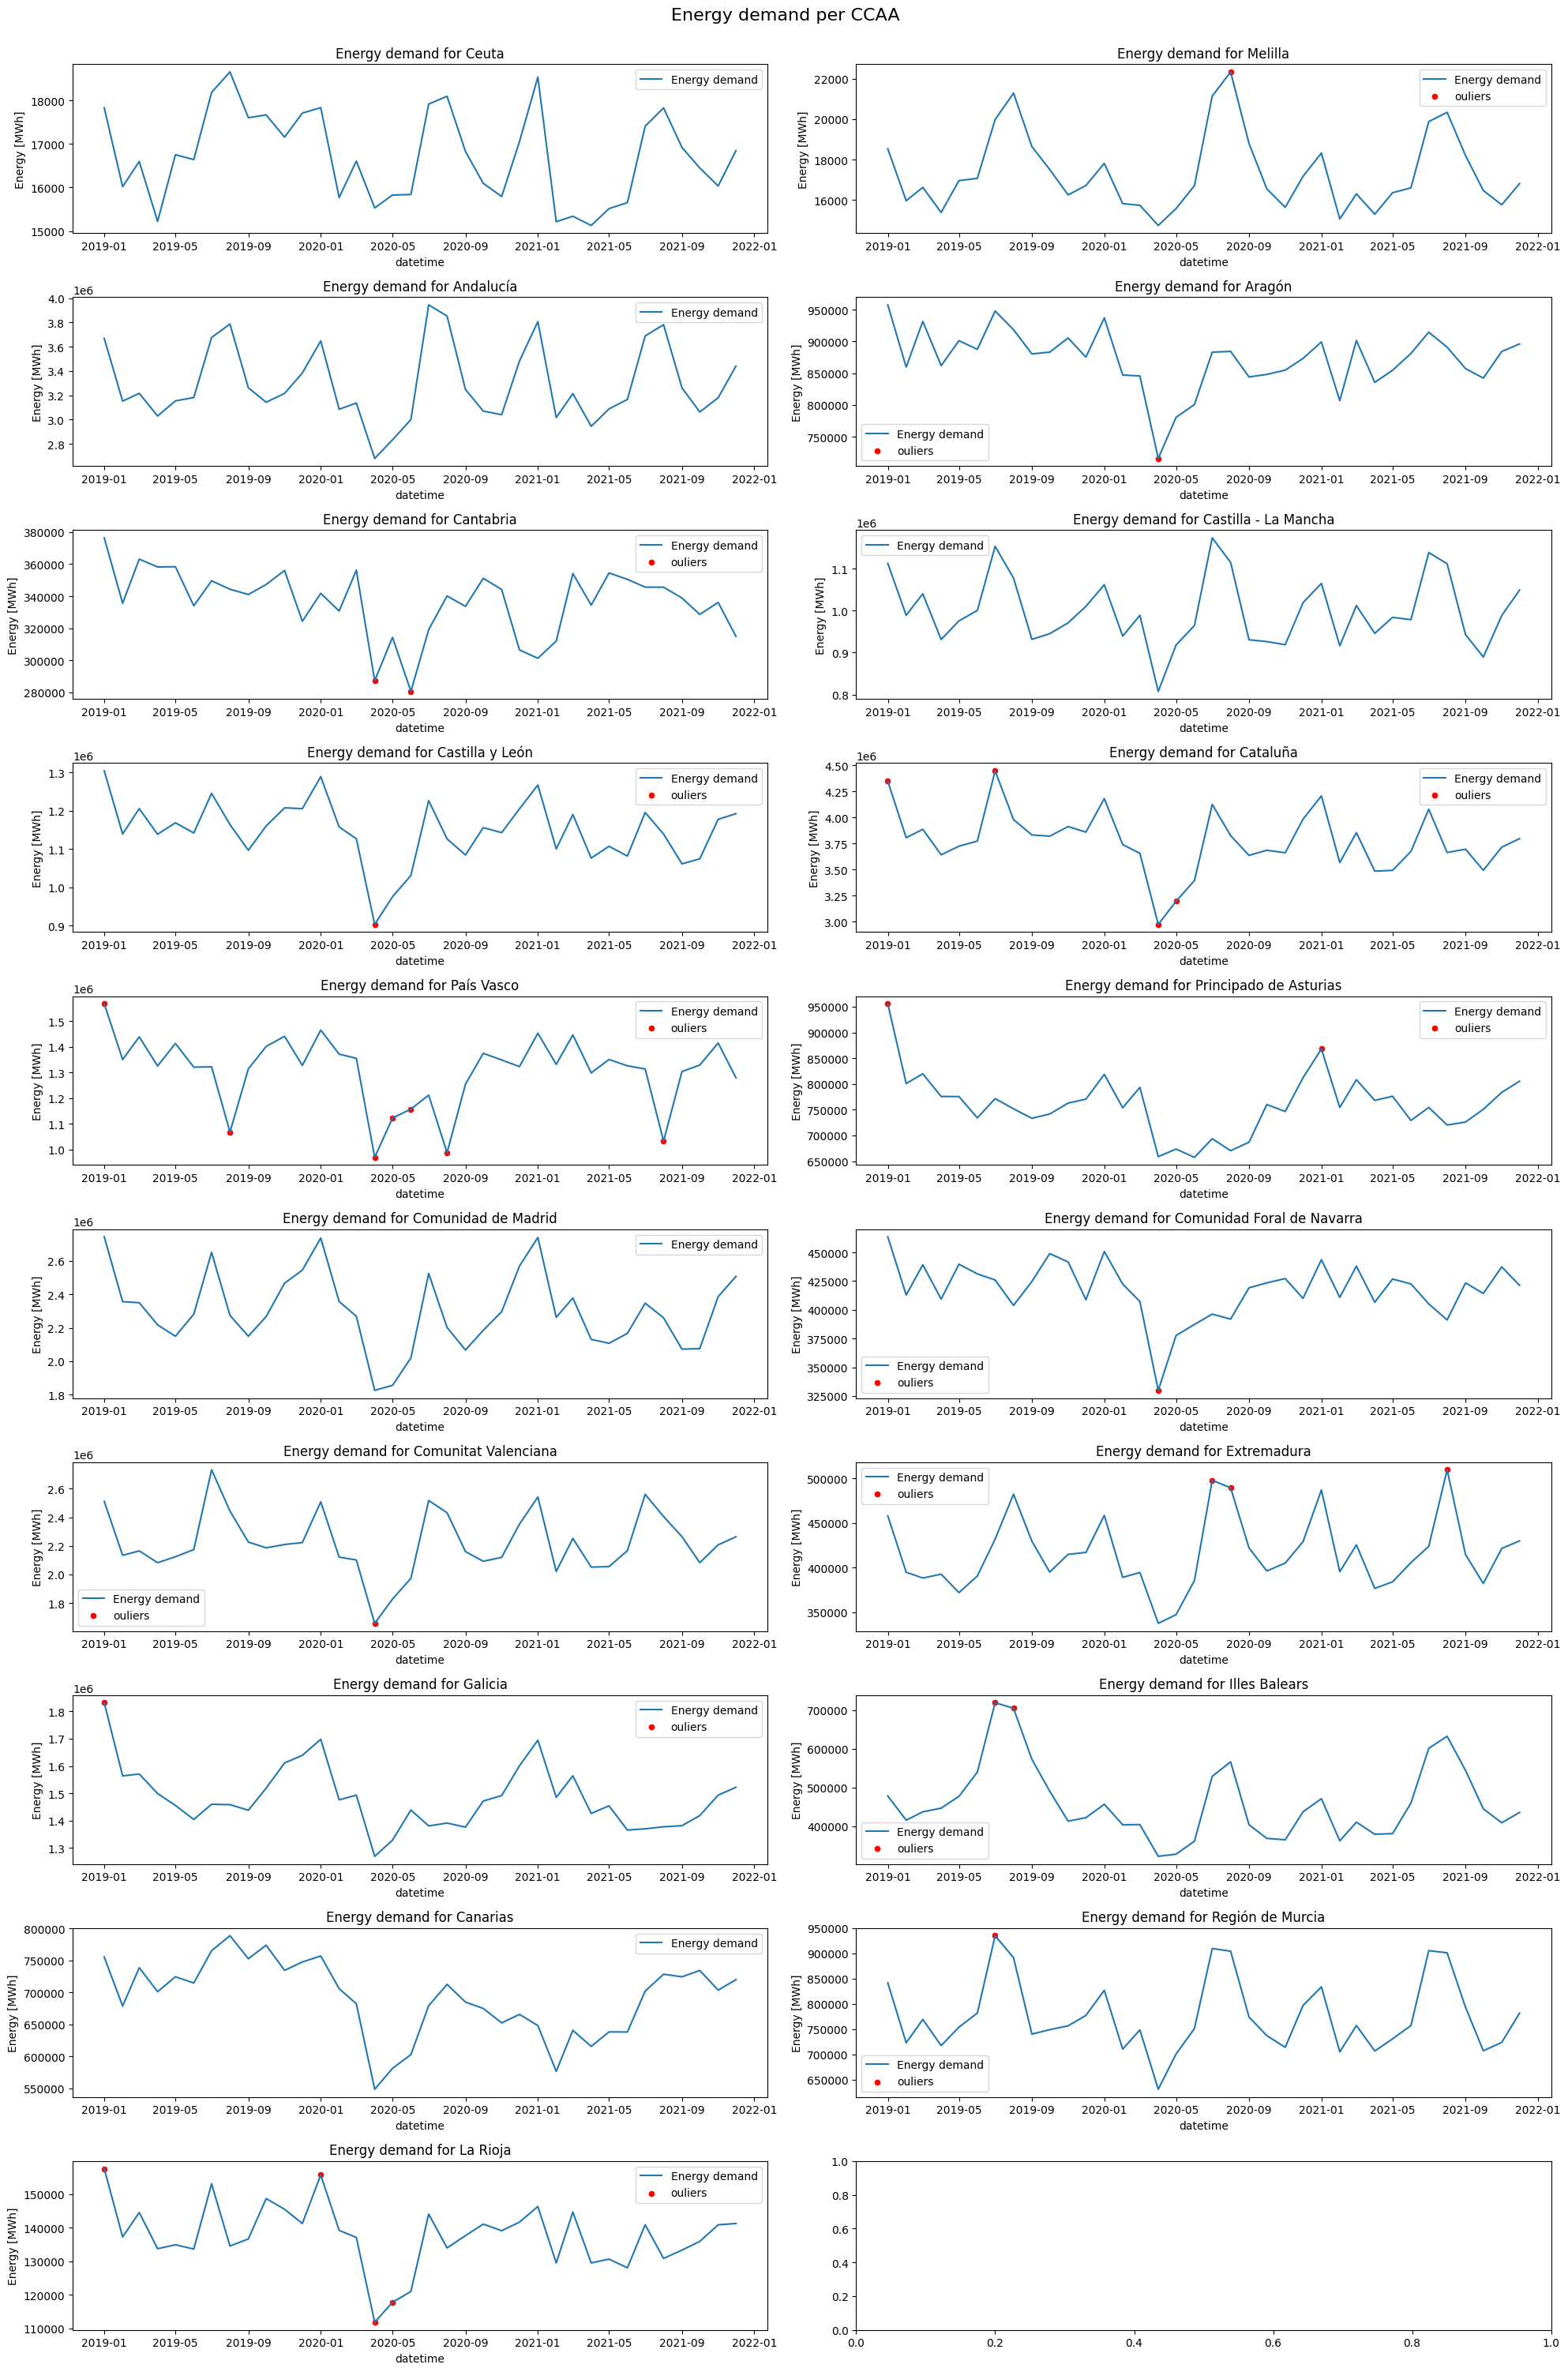

In [10]:
fig, axes = plt.subplots(10,2, figsize=(20,30))

axes_flat = axes.flat

plt.suptitle("Energy demand per CCAA", y=1, fontsize=16)

for ax, ccaa in zip(axes_flat, list(demanda_evolucion_df["ccaa"].unique())):
    ax.set_title(f"Energy demand for {ccaa}")
    ccaa_mask = demanda_evolucion_df["ccaa"] == ccaa
    sns.lineplot(data=demanda_evolucion_df[ccaa_mask], x='datetime', y='value', label="Energy demand", ax=ax)

    demanda_evolucion_df.loc[ccaa_mask,"outliers"] = find_outliers(demanda_evolucion_df.loc[ccaa_mask,"value"]).astype(int)
    outlier_points = demanda_evolucion_df[(demanda_evolucion_df['outliers'] == 1) & (ccaa_mask)]
    sns.scatterplot(data=outlier_points, x= "datetime", y="value", color='red', label='ouliers', ax=ax)
    ax.set_ylabel("Energy [MWh]")

plt.tight_layout()
plt.show()

It is interesting to observe that most communities had a period of especially low demand, considered outlier on the low spectrum, around April 2020. During this time, Spain suffered a severe lockdown due to the pandemic, which caused many industrial and commercial activities to hit pause, which in turn cascades on a low demand of energy as everyone stayed home. 

Appart from that, not many more low outliers are found appart from Pais Vasco in August 2019 and 2021. It would be worth checking if there is an underlying reason for that pattern.

On the other, higher side, of the spectrum, there are high outliers here and there that do not seem to show a pattern except for La Rioja in January 2019 and 2020 and Extremadura in summers 2020 and 2021.

All in all, they all follow natural outlier patterns.



## 2.2 Energy generation

Let's first of all check the data types:

In [11]:
generacion_renovables_df.info()
generacion_renovables_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3557 entries, 0 to 3556
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       3557 non-null   float64
 1   percentage  3557 non-null   float64
 2   datetime    3557 non-null   object 
 3   type        3557 non-null   object 
 4   ccaa        3557 non-null   object 
 5   cod_ccaa    3557 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 166.9+ KB


,value,percentage,datetime,type,ccaa,cod_ccaa
0,5.053,0.009113,2019-01-01T00:00:00.000+01:00,Solar fotovoltaica,Melilla,8745
1,5.526,0.011159,2019-02-01T00:00:00.000+01:00,Solar fotovoltaica,Melilla,8745
2,6.561,0.012039,2019-03-01T00:00:00.000+01:00,Solar fotovoltaica,Melilla,8745
3,7.925,0.016925,2019-04-01T00:00:00.000+02:00,Solar fotovoltaica,Melilla,8745
4,8.683,0.016244,2019-05-01T00:00:00.000+02:00,Solar fotovoltaica,Melilla,8745


There seem to be no null values, except if there are categories encoded as text 'NaN' or similar, or there are numerical values out of normal range like negative values or high order 9*e10.

Changing datetime to datetime dtype and checking nummerical value descriptive summary:

In [12]:
generacion_renovables_df["datetime"] = pd.to_datetime(generacion_renovables_df["datetime"], utc=True).dt.tz_localize(None)
generacion_renovables_df.info()

generacion_renovables_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3557 entries, 0 to 3556
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   value       3557 non-null   float64       
 1   percentage  3557 non-null   float64       
 2   datetime    3557 non-null   datetime64[ns]
 3   type        3557 non-null   object        
 4   ccaa        3557 non-null   object        
 5   cod_ccaa    3557 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 166.9+ KB


,value,percentage,datetime,cod_ccaa
count,3.557000e+03,3557.000000,3557,3557.000000
mean,1.855370e+05,0.364633,2020-06-16 09:47:57.368568832,1246.396964
min,1.900000e-01,0.000002,2018-12-31 23:00:00,4.000000
25%,7.193698e+03,0.035674,2019-09-30 22:00:00,8.000000
50%,3.069304e+04,0.206367,2020-06-30 22:00:00,13.000000
75%,1.786868e+05,0.653753,2021-03-31 22:00:00,20.000000
max,3.102351e+06,1.000000,2021-11-30 23:00:00,8745.000000
std,3.581289e+05,0.373216,NaN,3042.813710


The fact that there are 1 valued percentages (or proportions rather) is suspicious. This is explained by the fact that there is a type of generation called 'Generacion renovable' that is equal to the sum of all other generations. This category should actually be dropped, so let's drop it and also check other type values:

In [13]:
generacion_renovables_df = generacion_renovables_df[generacion_renovables_df["type"]!="Generación renovable"].reset_index(drop=True)

display(generacion_renovables_df["type"].unique())

array(['Solar fotovoltaica', 'Residuos renovables', 'Hidráulica',
       'Eólica', 'Solar térmica', 'Otras renovables', 'Hidroeólica'],
      dtype=object)

There is also a type called 'Residuos renovables', which I suspect could be something else different from a type of generation, just like 'Generacion renovable' was.

In [14]:
display(generacion_renovables_df.describe(include="O"))

generacion_renovables_df = generacion_renovables_df[generacion_renovables_df["type"]!="Generación renovable"].reset_index(drop=True)

generacion_renovables_df

,type,ccaa
count,2909,2909
unique,7,18
top,Solar fotovoltaica,Cataluña
freq,647,216


,value,percentage,datetime,type,ccaa,cod_ccaa
0,5.053,0.009113,2018-12-31 23:00:00,Solar fotovoltaica,Melilla,8745
1,5.526,0.011159,2019-01-31 23:00:00,Solar fotovoltaica,Melilla,8745
2,6.561,0.012039,2019-02-28 23:00:00,Solar fotovoltaica,Melilla,8745
3,7.925,0.016925,2019-03-31 22:00:00,Solar fotovoltaica,Melilla,8745
4,8.683,0.016244,2019-04-30 22:00:00,Solar fotovoltaica,Melilla,8745
...,...,...,...,...,...,...
2904,645.334,0.007775,2021-07-31 22:00:00,Otras renovables,La Rioja,20
2905,695.538,0.011859,2021-08-31 22:00:00,Otras renovables,La Rioja,20
2906,588.318,0.008108,2021-09-30 22:00:00,Otras renovables,La Rioja,20
2907,434.937,0.002701,2021-10-31 23:00:00,Otras renovables,La Rioja,20


In [15]:
print(f"There should be 19 CCAA and there are {len(generacion_renovables_df['ccaa'].unique())}.")
generacion_renovables_df['ccaa'].unique()

There should be 19 CCAA and there are 18.


array(['Melilla', 'Andalucía', 'Aragón', 'Cantabria',
       'Castilla - La Mancha', 'Castilla y León', 'Cataluña',
       'País Vasco', 'Principado de Asturias', 'Comunidad de Madrid',
       'Comunidad Foral de Navarra', 'Comunitat Valenciana',
       'Extremadura', 'Galicia', 'Illes Balears', 'Canarias',
       'Región de Murcia', 'La Rioja'], dtype=object)

There are no typos in the CCAA names.

In [16]:
for ccaa in list(generacion_renovables_df["ccaa"].unique()):
    fig = px.area(generacion_renovables_df[generacion_renovables_df["ccaa"]==ccaa], x="datetime", y="percentage", color="type")
    fig.update_layout(title=f'Contribution to energy generation in {ccaa} per category.')
    fig.show()

Without getting into an analysis, from the graphs above it does look like 'Residuos renovables' is a type of generation. However, there is actually a sign of error at the end of the timeline where percentage for both 'Residuos renovables' and 'Solar fotovoltaica' is 1. 

Although unsure about what the right category is, judging from the almost 0 values of 'Solar fotovoltaica' and almost 1 for 'Residuos renovables' accross the timeline, it is likely that 'Residuos renovables' is the one that's 0.

The below plot of the absolute magnitudes, 'value', clarifies this, as 'Solar fotovoltaica' has an almost 0 value.

In [17]:
for ccaa in list(generacion_renovables_df["ccaa"].unique()):
    
    ccaa_data = generacion_renovables_df[generacion_renovables_df["ccaa"] == ccaa]

    fig = px.area(ccaa_data, x="datetime", y="value", color="type")
    fig.update_layout(title=f'Contribution to energy generation in {ccaa} per category.')


    fig.show()

Filling percentage as 0 for generation in Melilla.

In [18]:
generacion_renovables_df.loc[(generacion_renovables_df["ccaa"] == "Melilla") & (generacion_renovables_df["percentage"] == 1),"percentage"] = 0

Finding outliers, it makes sense to find them by type of energy creation and city. Thus, to explore this, the `group_find_outliers()` function has been written on the `src/cleaning_support.py` script to tag outliers within groups from a selected list of columns.

In [19]:
generacion_renovables_df["type_ccaa_outliers"] = group_calculate_outliers(generacion_renovables_df,["ccaa","type"])

Now, to check if this function works correctly, we can plot outliers through boxplots observing if all points beyond IQR*1.5 to the left or right have been tagged by the function:

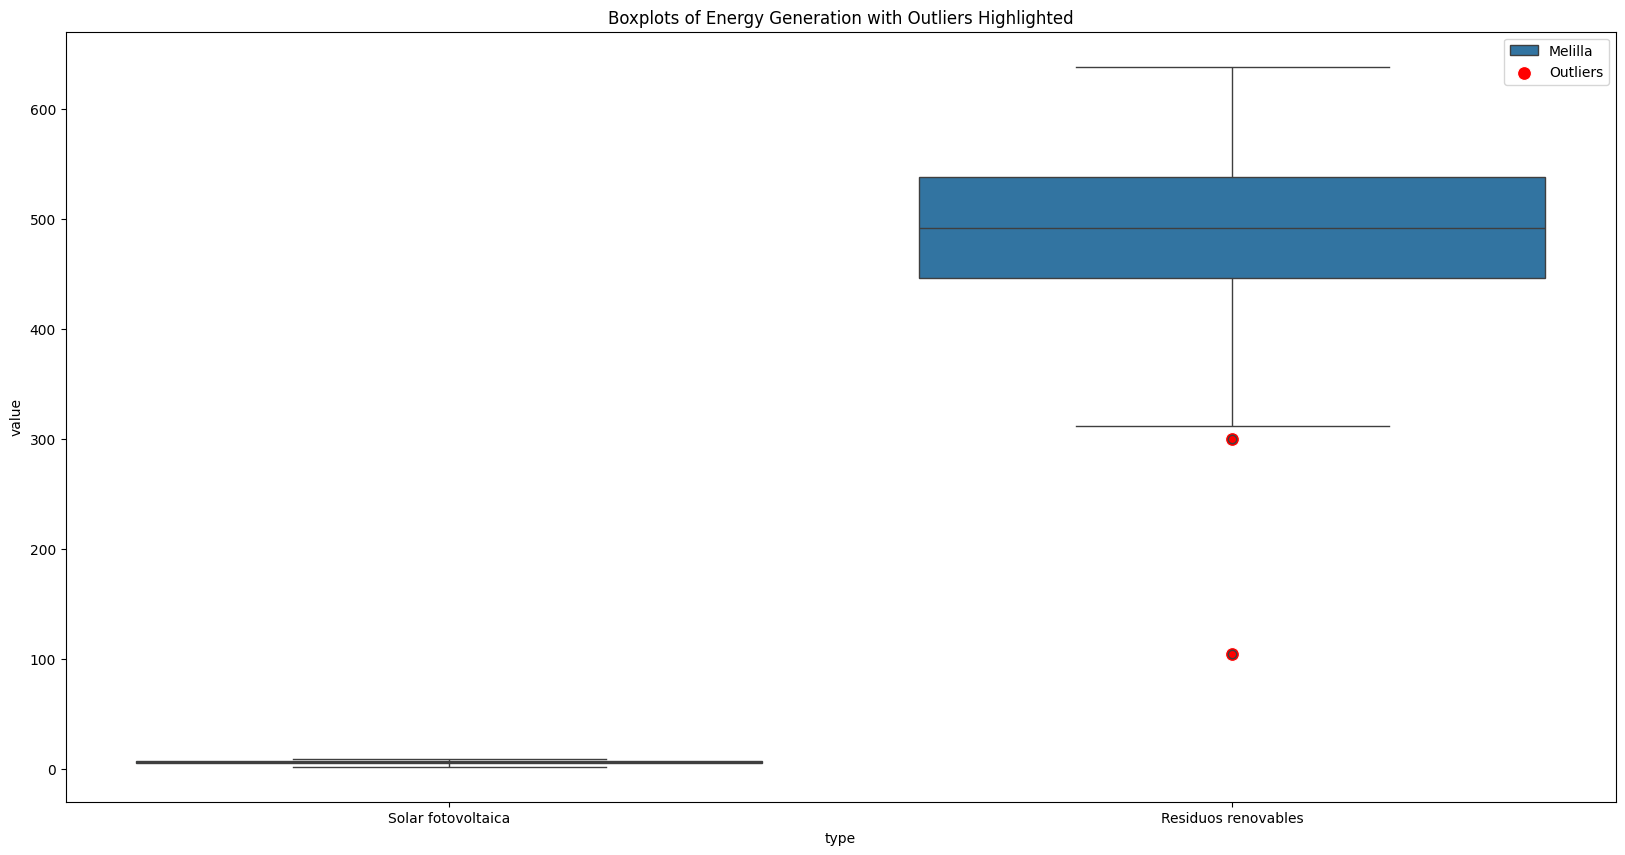

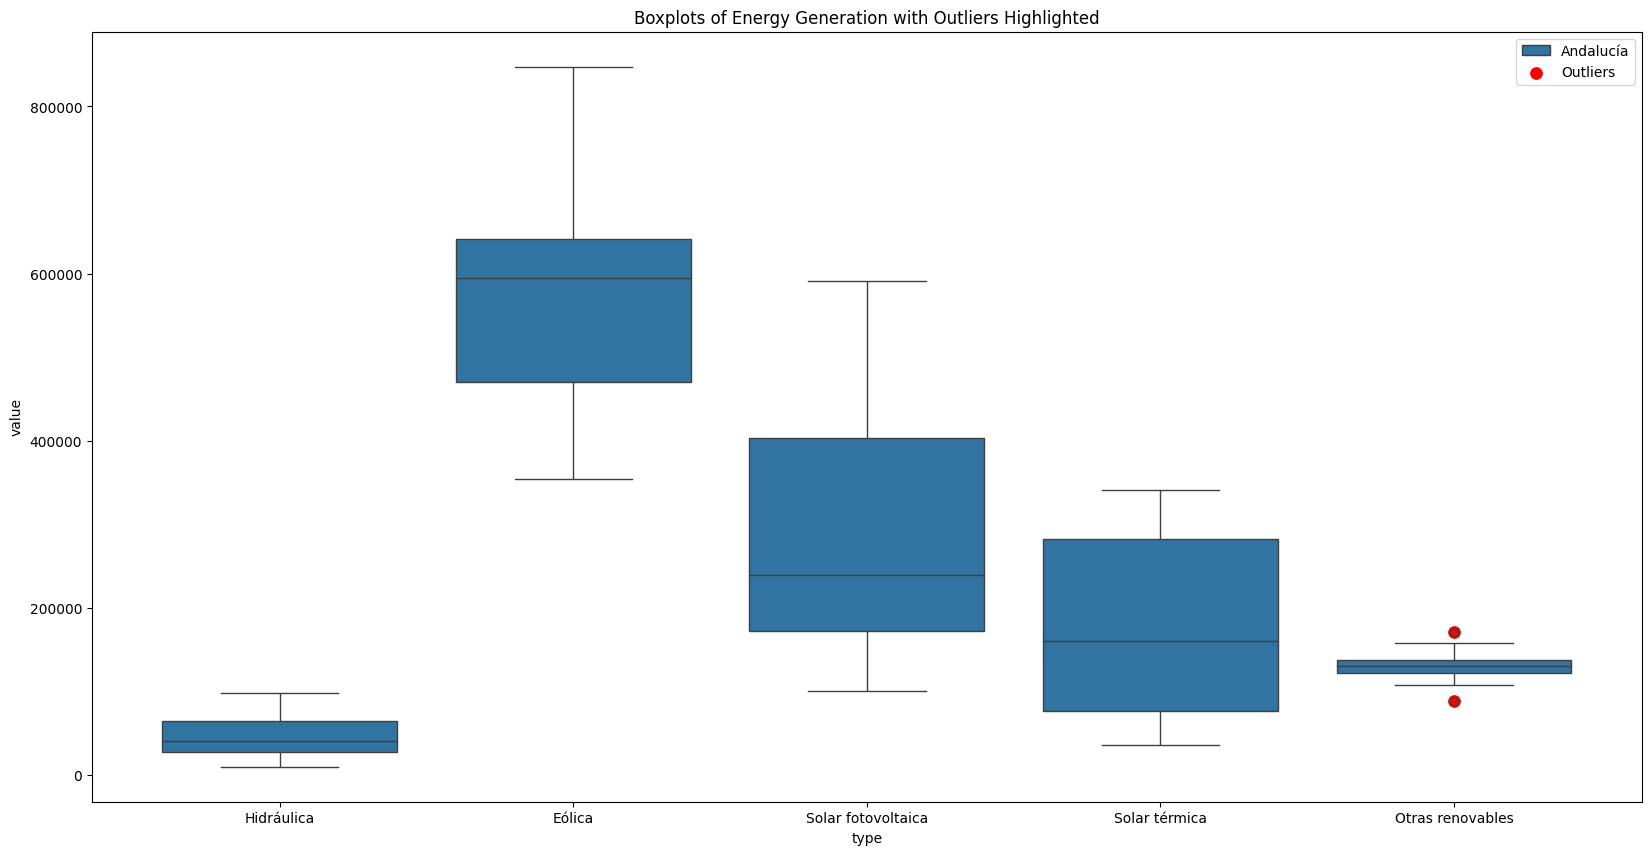

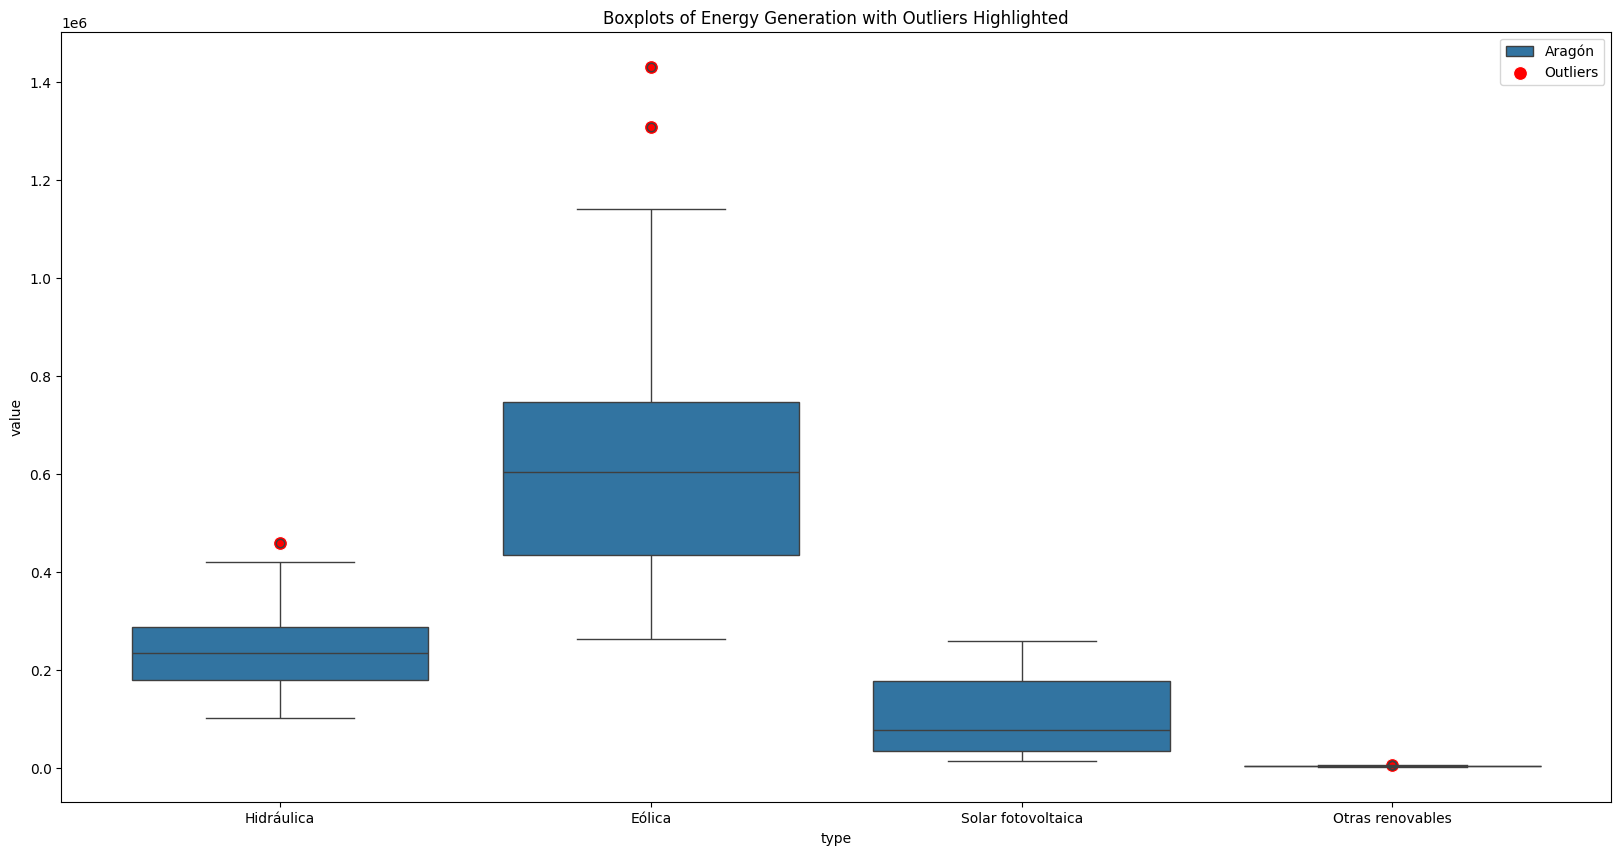

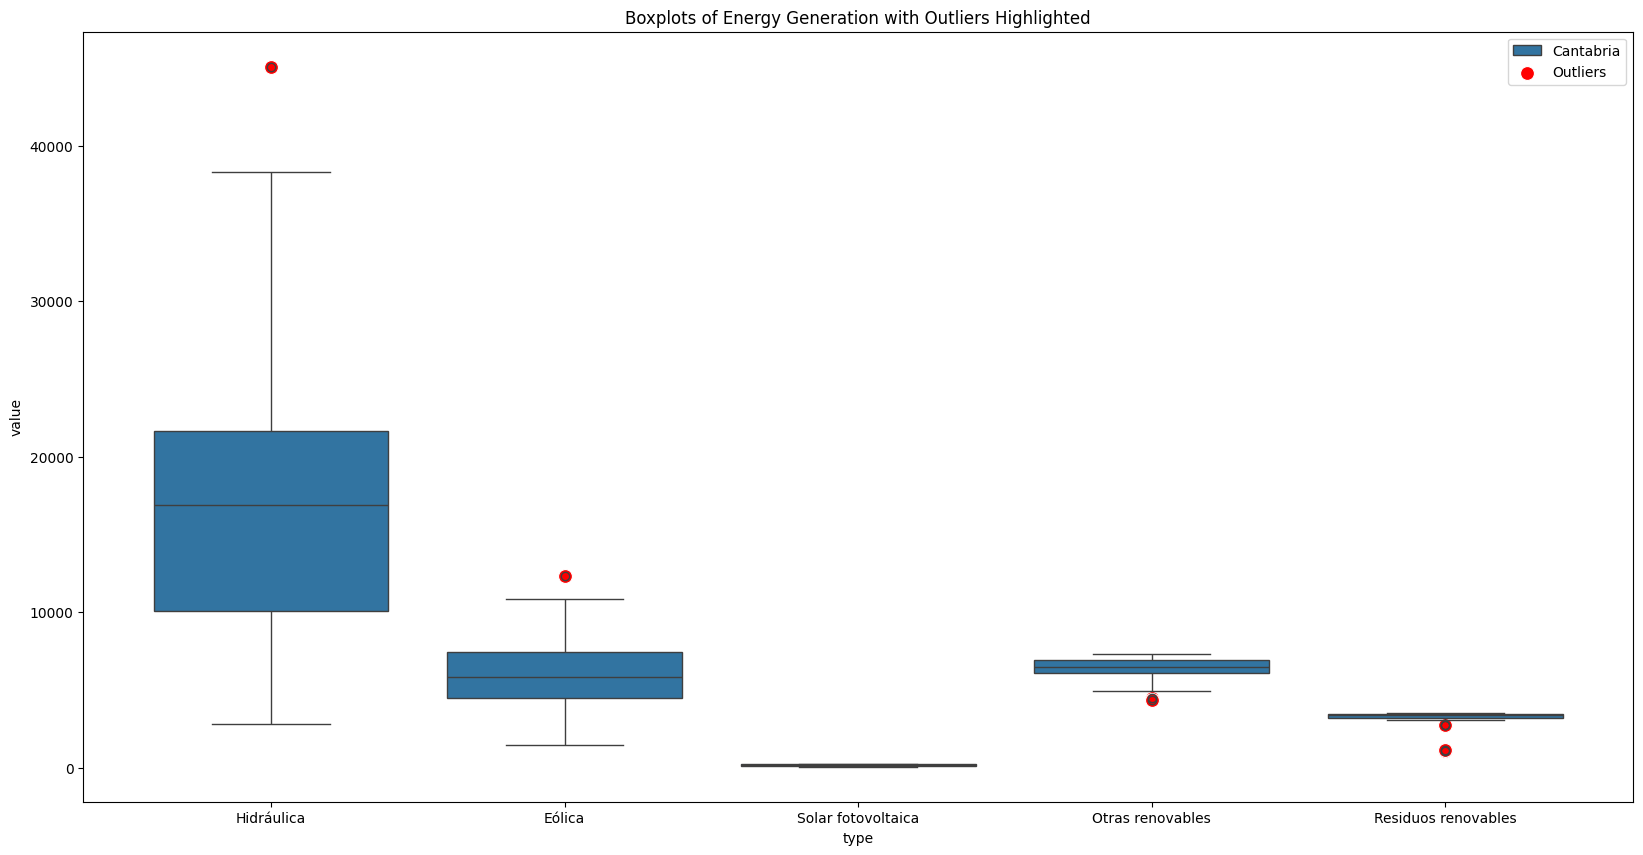

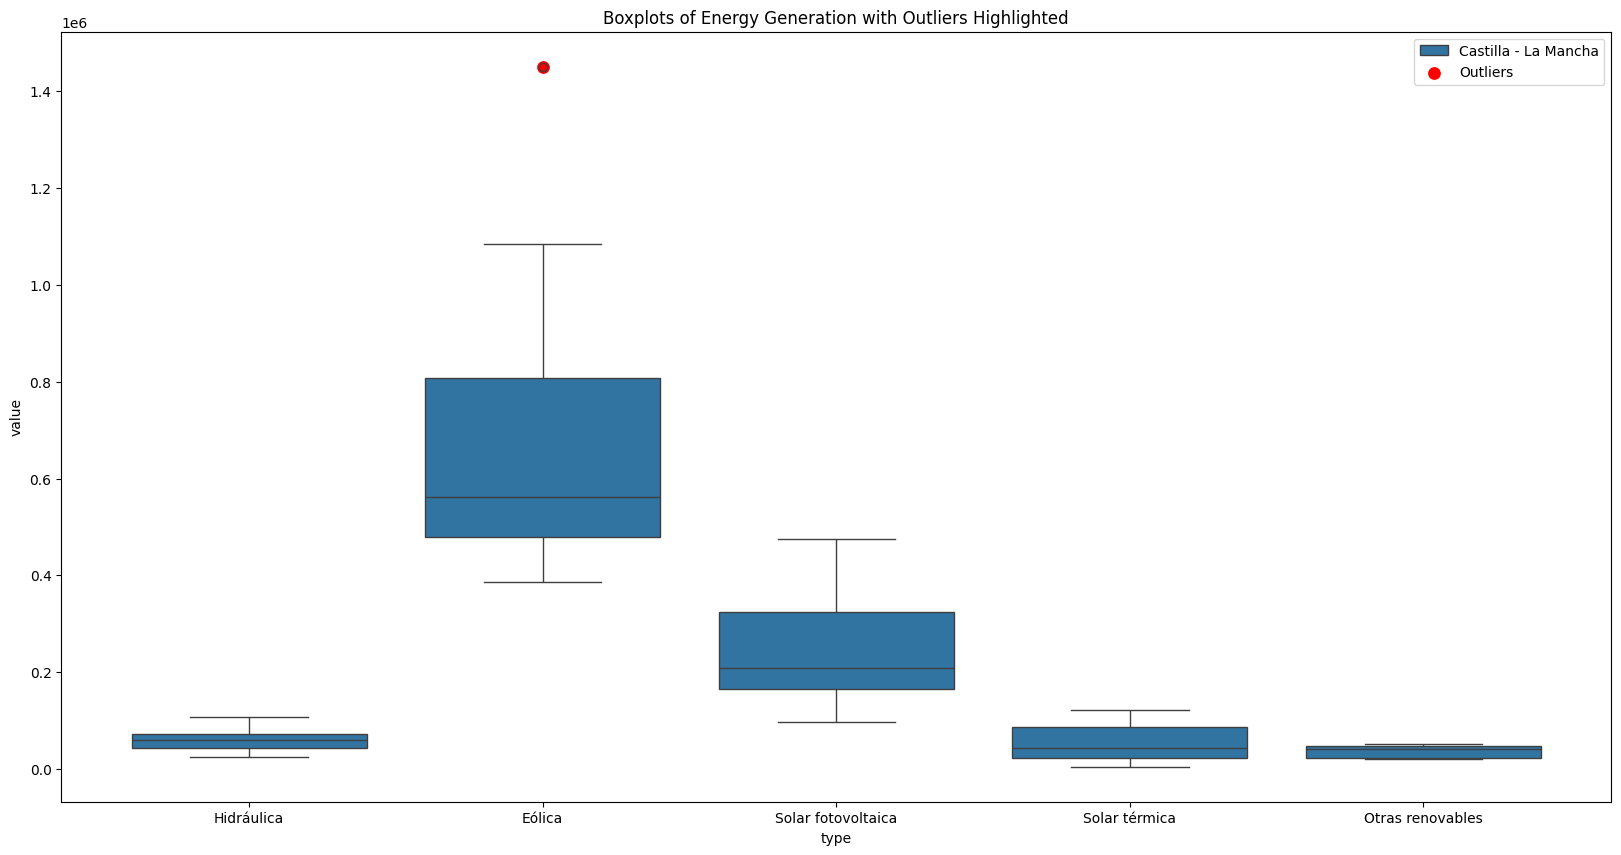

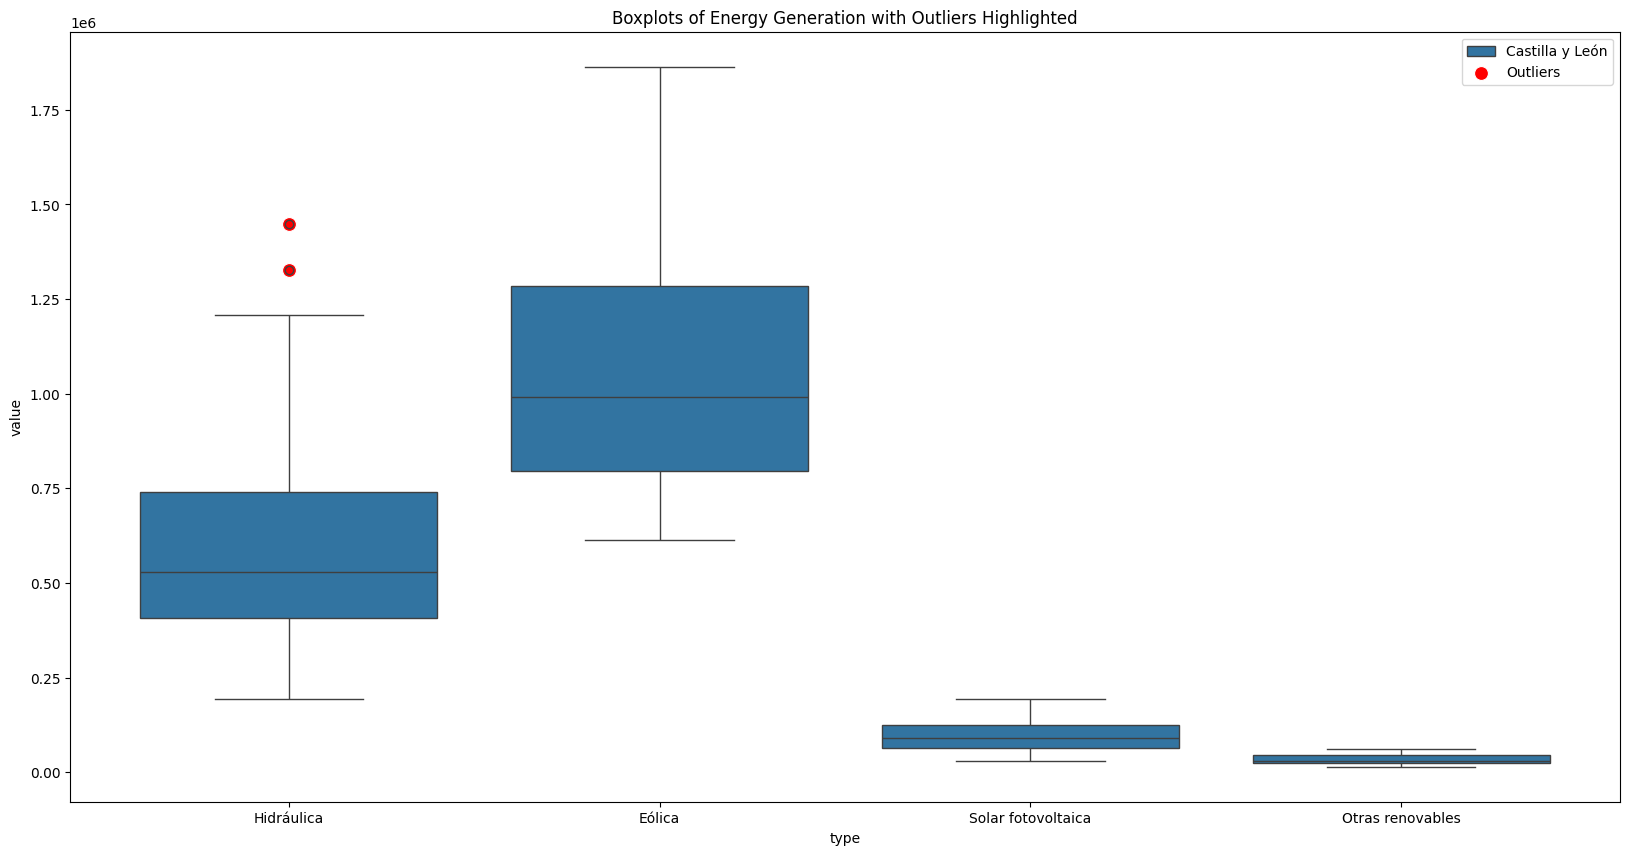

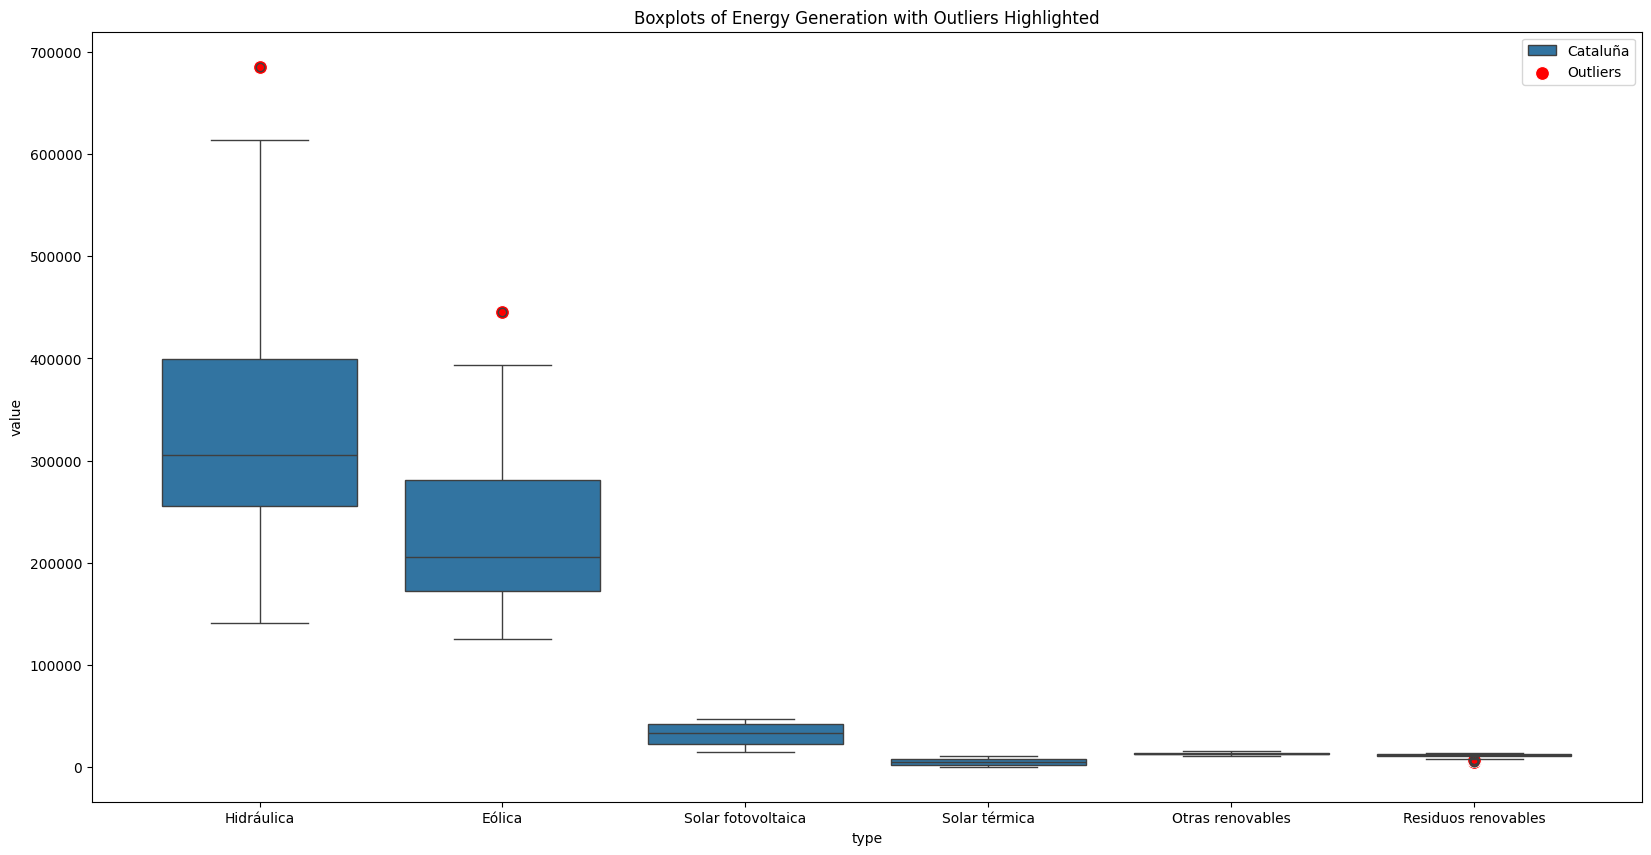

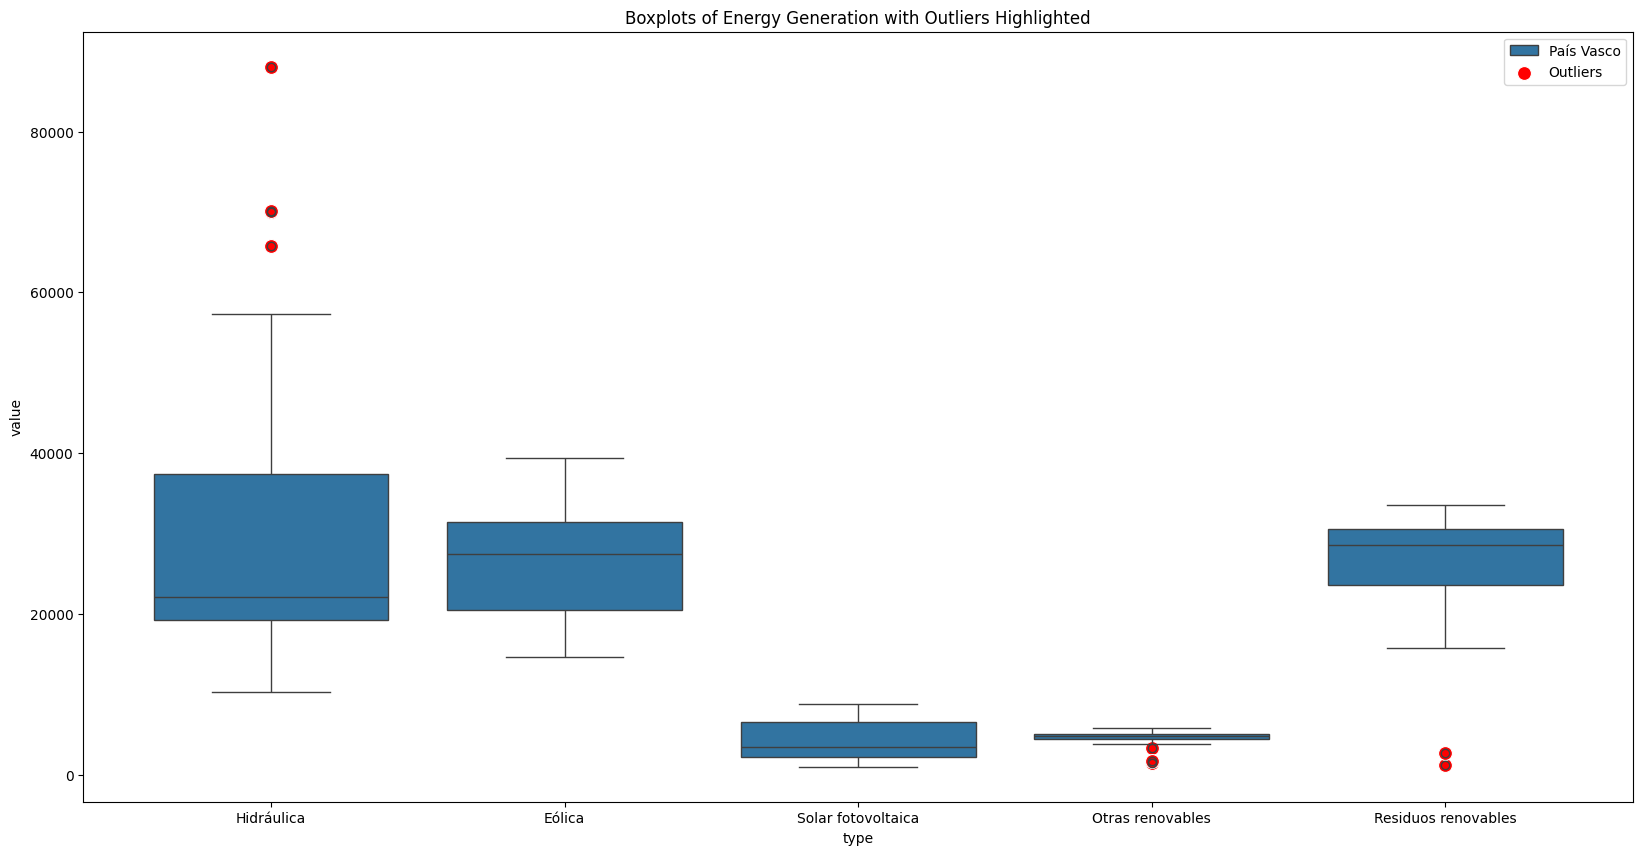

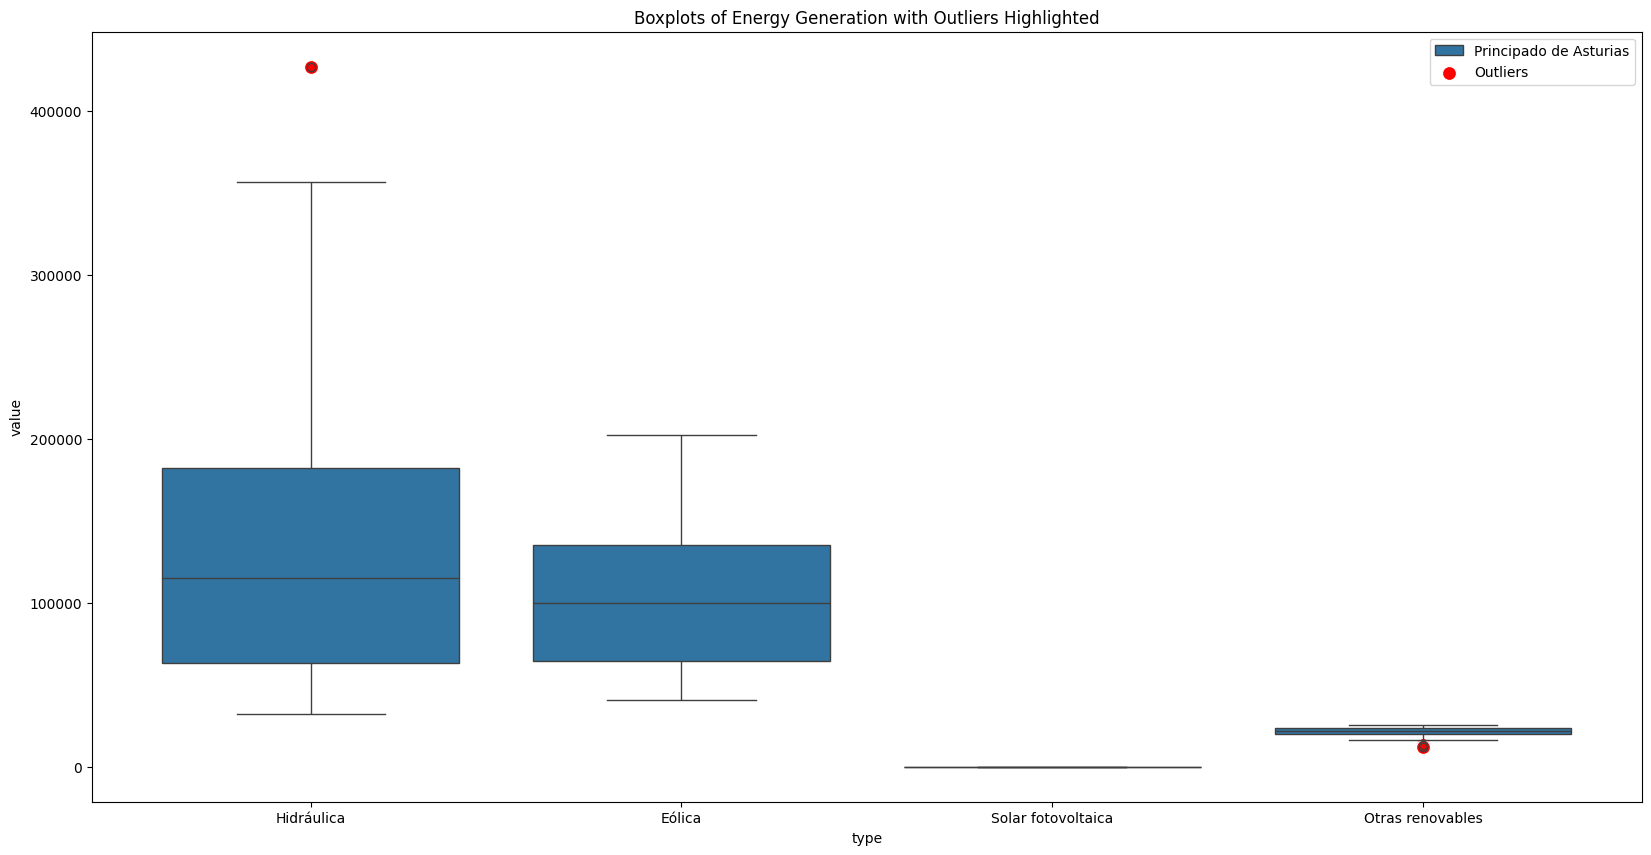

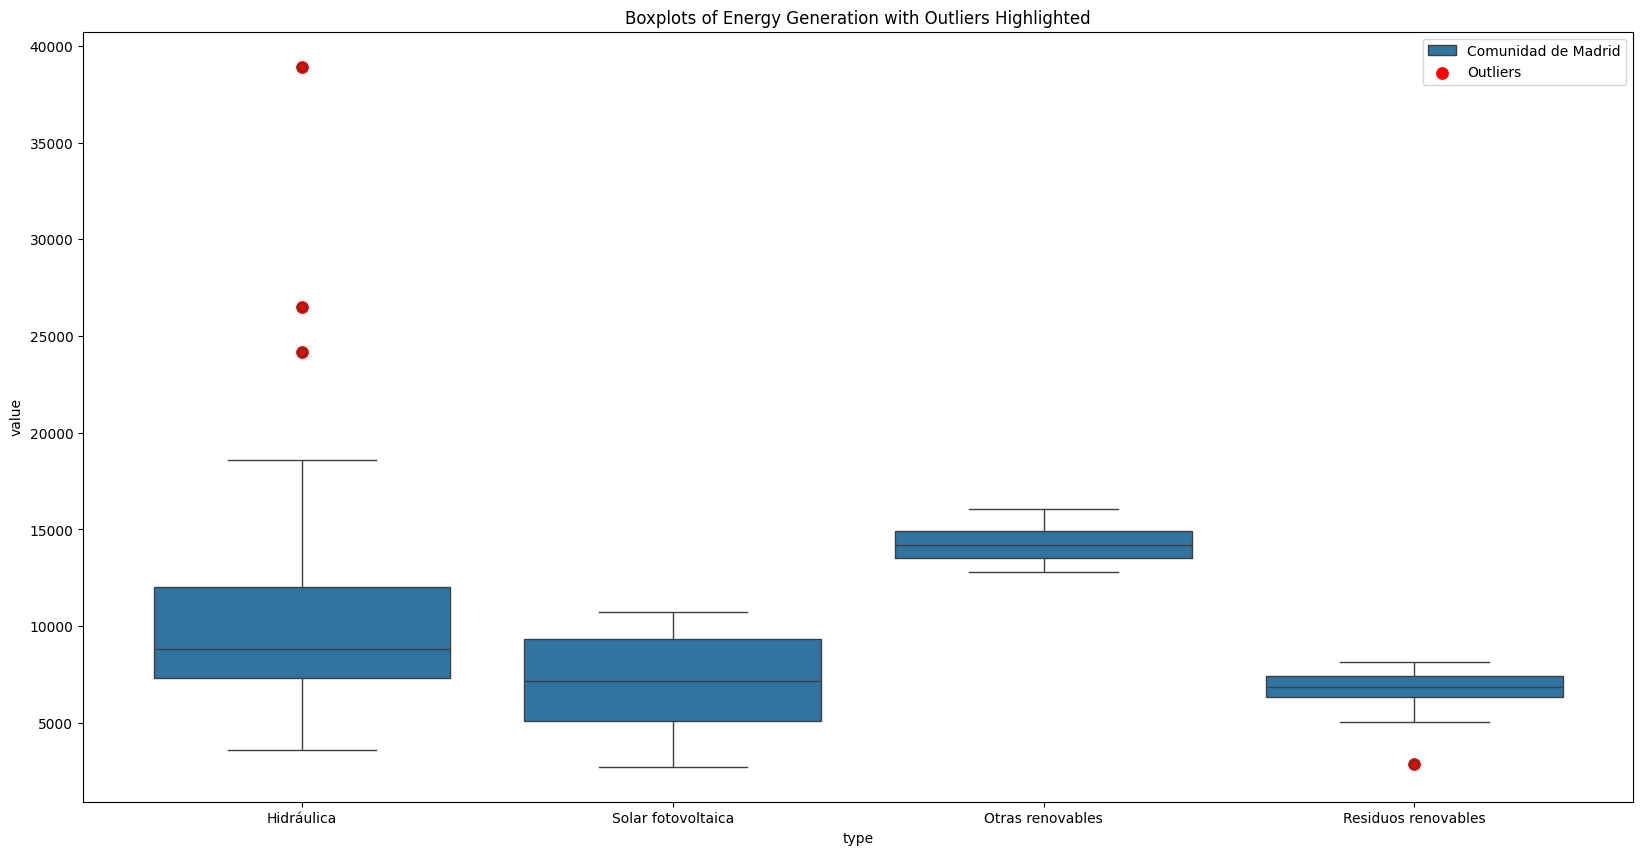

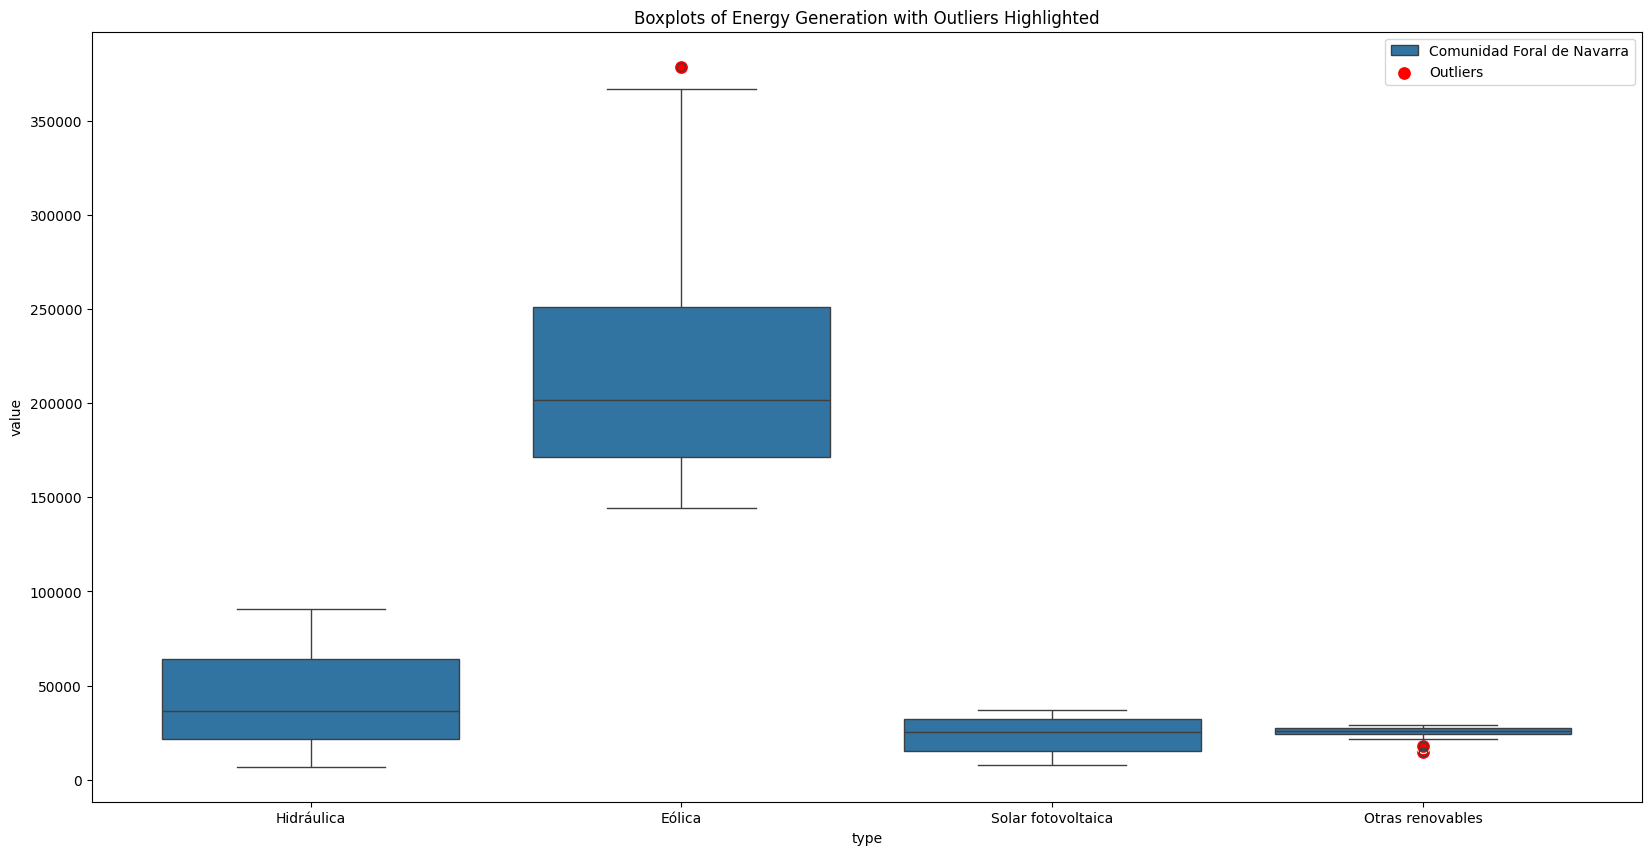

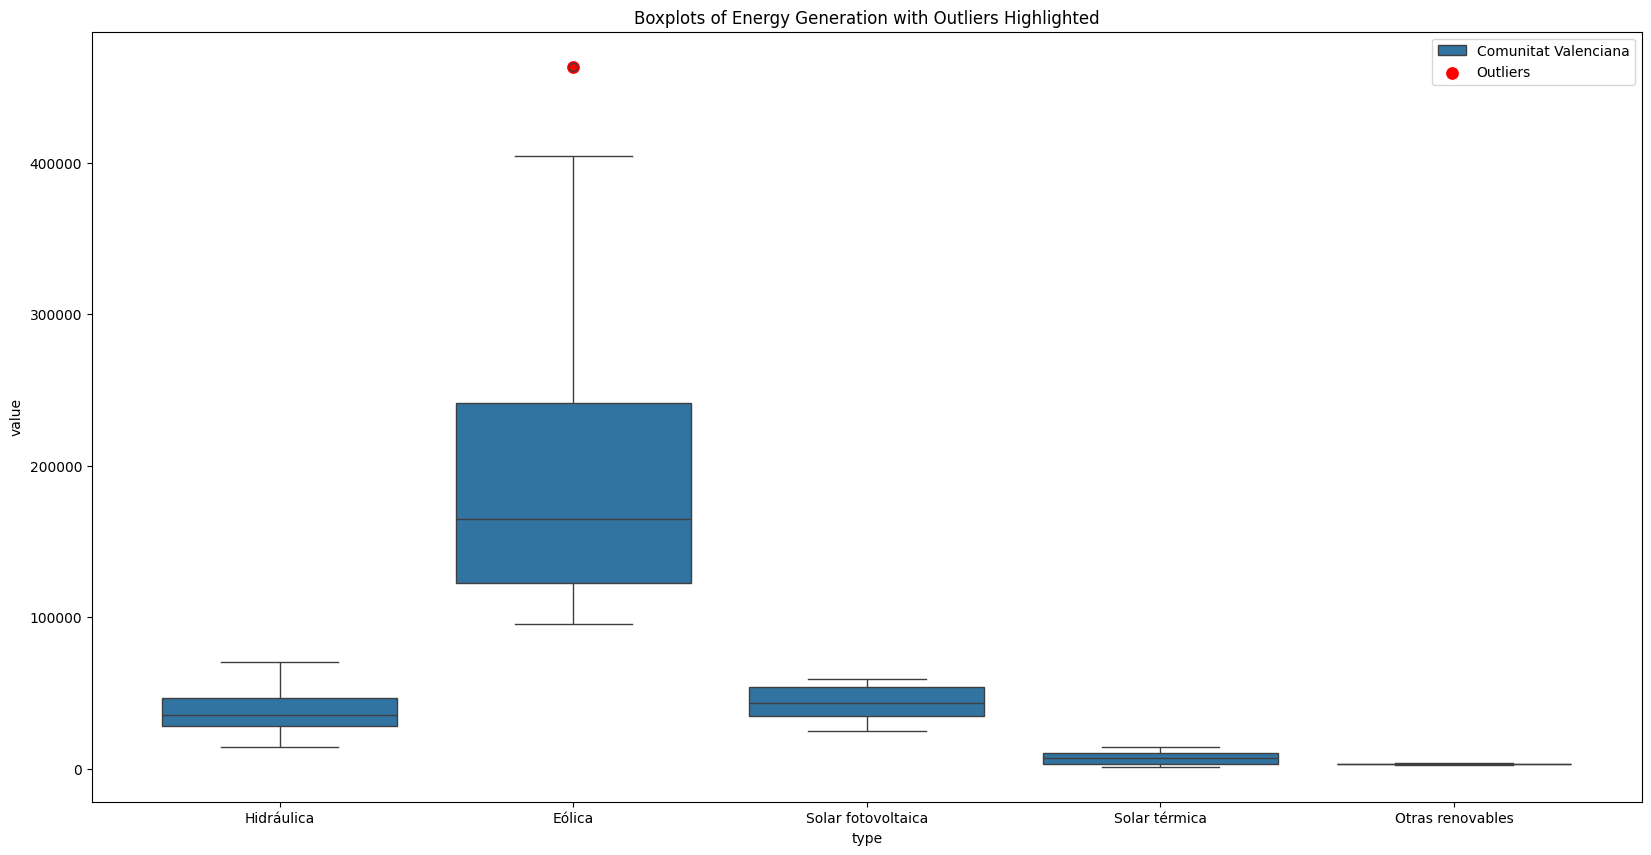

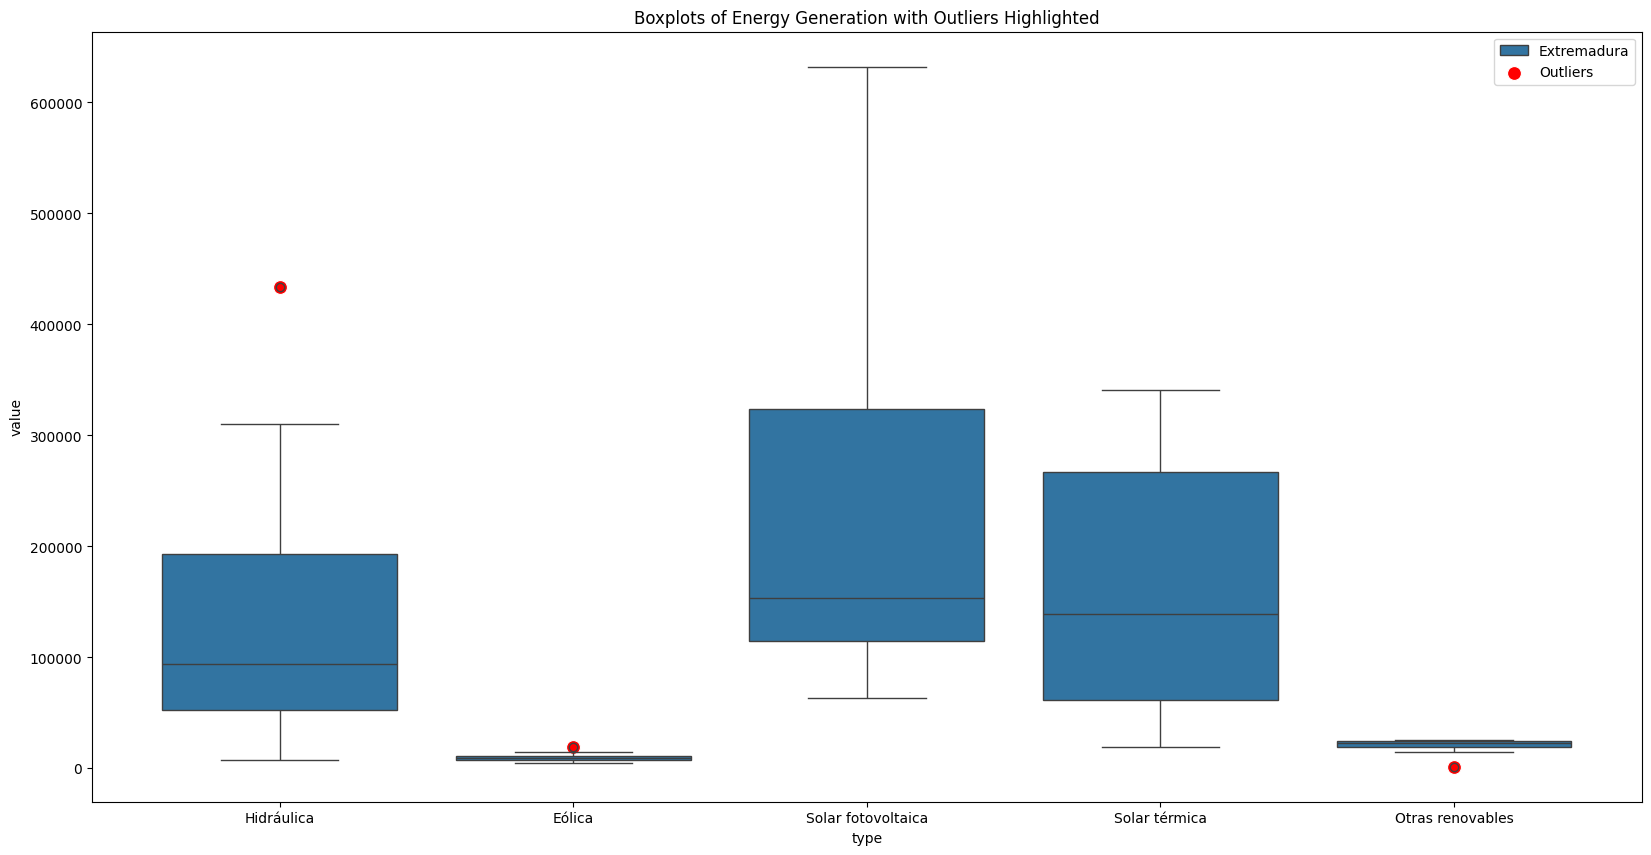

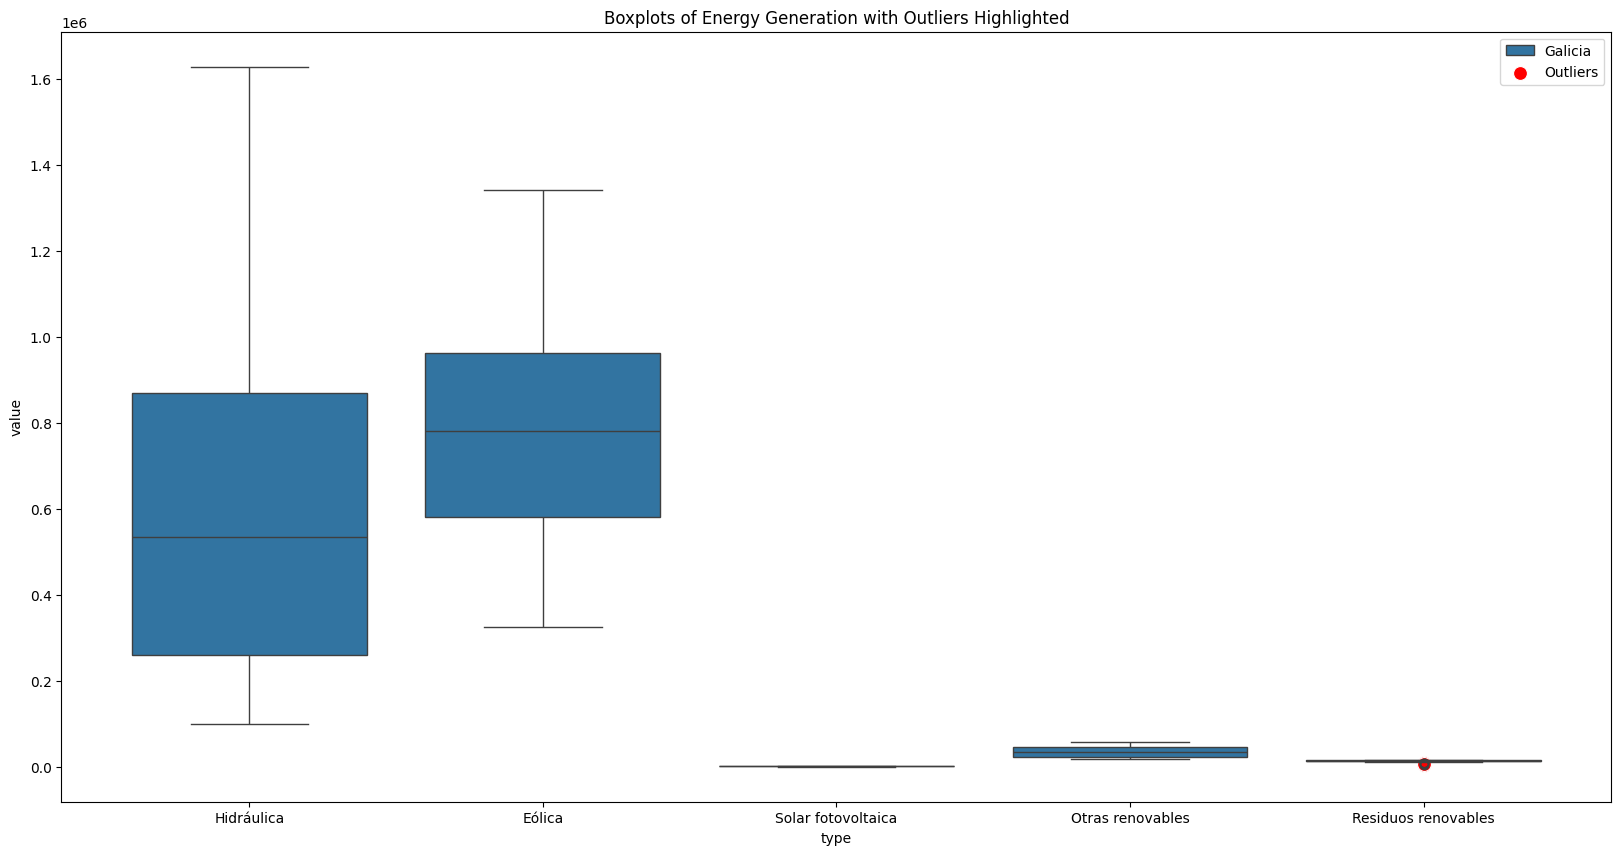

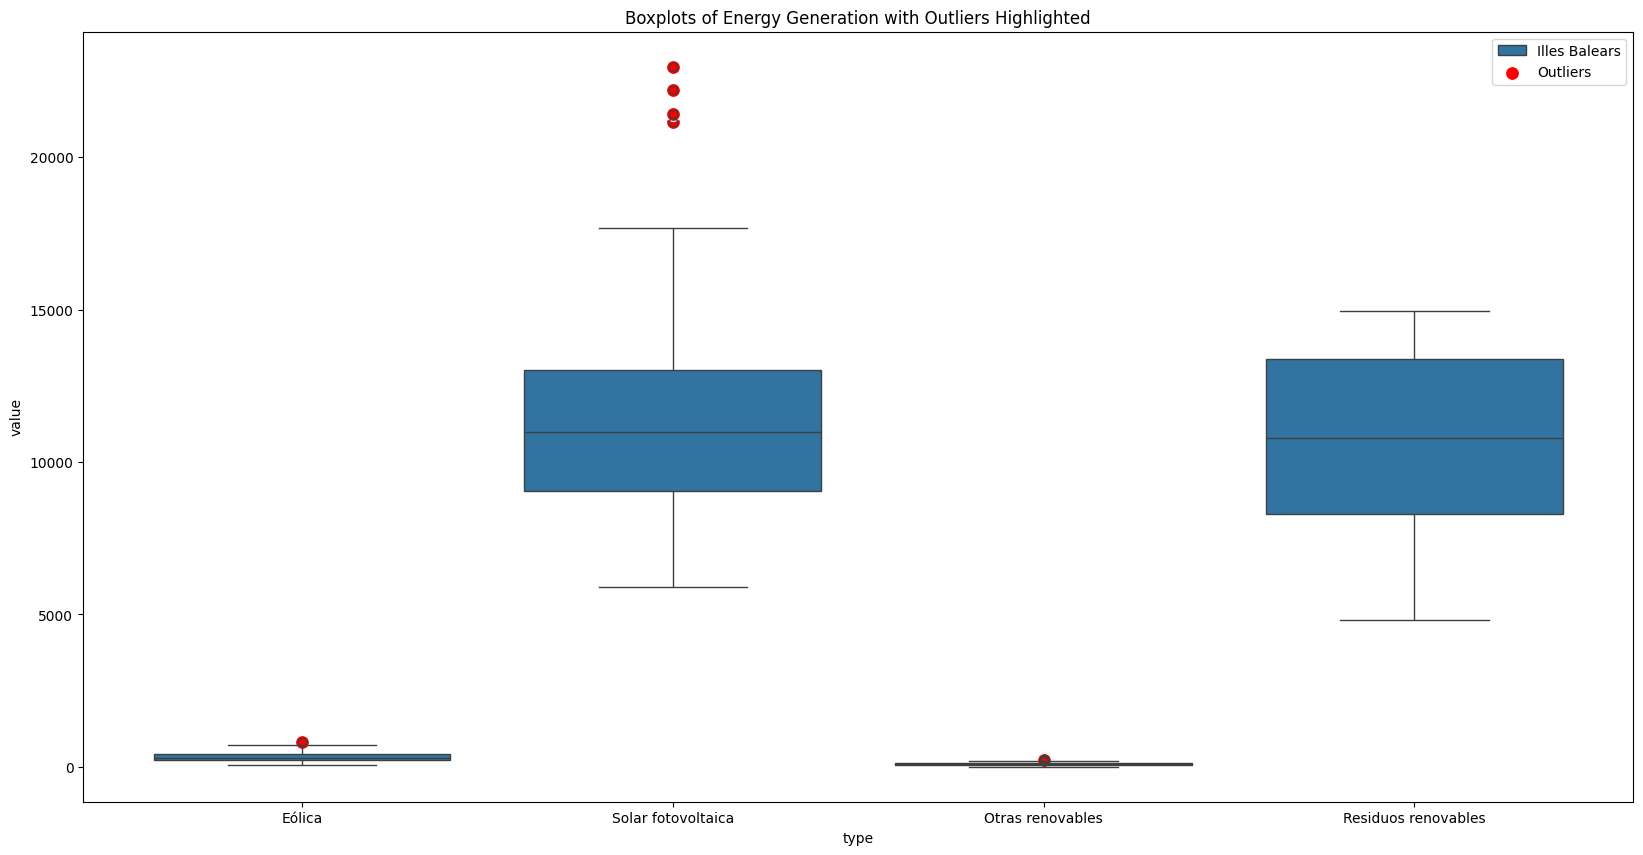

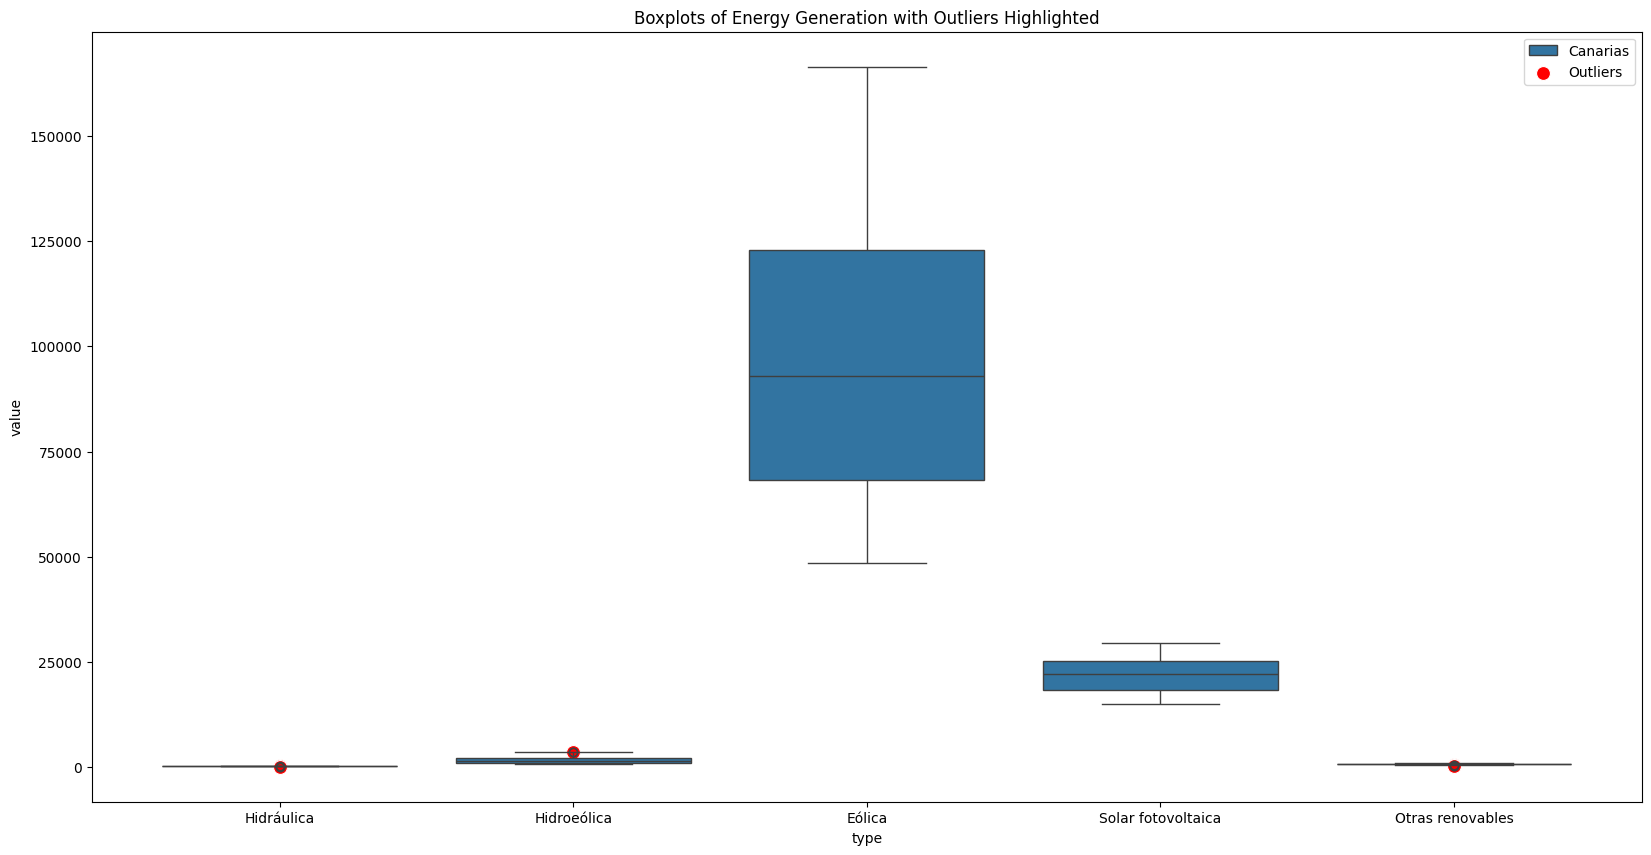

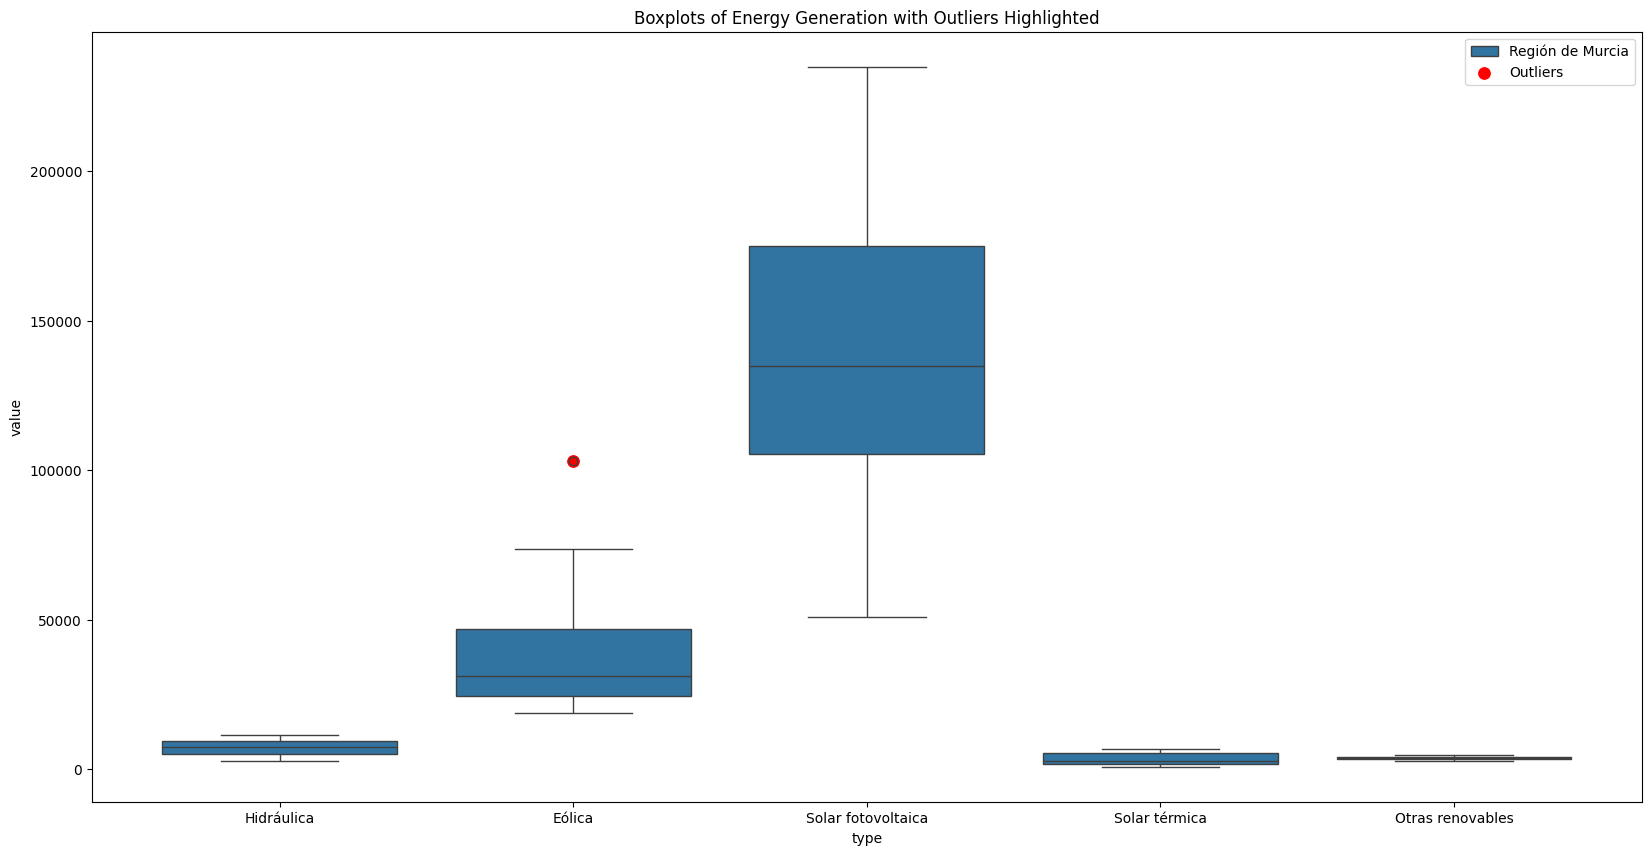

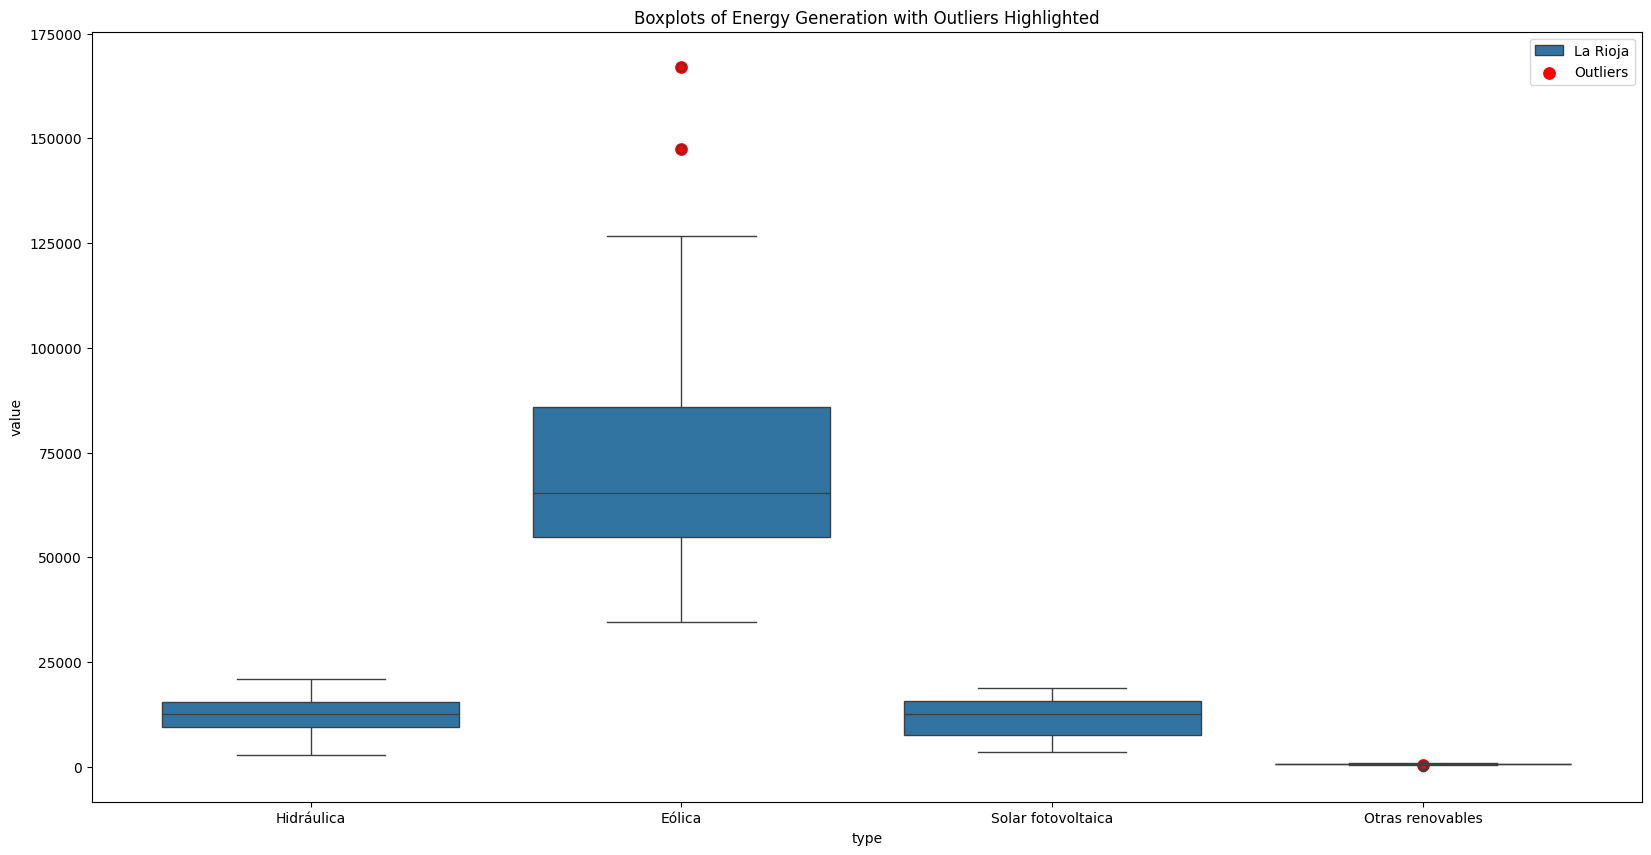

In [20]:
for ccaa in list(generacion_renovables_df["ccaa"].unique()):
    generacion_renovables_df_ccaa = generacion_renovables_df[generacion_renovables_df["ccaa"]==ccaa]
    plt.figure(figsize=(20,10))
    sns.boxplot(data=generacion_renovables_df_ccaa, x="type", y="value", hue="ccaa")

    outliers = generacion_renovables_df_ccaa[generacion_renovables_df_ccaa["type_ccaa_outliers"]==1]
    sns.scatterplot(data=outliers, x="type", y="value", color="red", s=100, marker="o", label="Outliers")

    plt.title("Boxplots of Energy Generation with Outliers Highlighted")
    plt.legend()
    plt.show()

The function works perfectly and the outliers have been tagged. It would now be a matter of plotting all separate time series by CCAA and Type of generation, which will not be very readable and is more interesting for a posterior analysis.

## 2.3 Demographic

In [21]:
demographic_df.info()
demographic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Provincias               1908 non-null   object
 1   Edad (3 grupos de edad)  1908 non-null   object
 2   Españoles/Extranjeros    1908 non-null   object
 3   Sexo                     1908 non-null   object
 4   Año                      1908 non-null   int64 
 5   Total                    1908 non-null   object
dtypes: int64(1), object(5)
memory usage: 89.6+ KB


,Provincias,Edad (3 grupos de edad),Españoles/Extranjeros,Sexo,Año,Total
0,TOTAL ESPAÑA,0-15 años,Españoles,Hombres,2021,3.272.369
1,TOTAL ESPAÑA,0-15 años,Españoles,Hombres,2020,3.338.410
2,TOTAL ESPAÑA,0-15 años,Españoles,Hombres,2019,3.386.006
3,TOTAL ESPAÑA,0-15 años,Españoles,Mujeres,2021,3.093.985
4,TOTAL ESPAÑA,0-15 años,Españoles,Mujeres,2020,3.155.541


The total column should have the points replaced. The province 'TOTAL ESPAÑA' should not be present unless we want to keep it for comparison purposes.

In [22]:
demographic_df = demographic_df[demographic_df["Provincias"]!="TOTAL ESPAÑA"].reset_index(drop=True)
demographic_df["Total"] = demographic_df["Total"].str.replace(".","").astype(int)

Provinces should have 52 different values appart from 'TOTAL ESPAÑA', edad should have 3 and 'Españones/Extranjeros' should have 2 with 'Sexo' as well. Also, column names could be standardised.

In [23]:
demographic_df.describe(include="O")

,Provincias,Edad (3 grupos de edad),Españoles/Extranjeros,Sexo
count,1872,1872,1872,1872
unique,52,3,2,2
top,02 Albacete,0-15 años,Españoles,Hombres
freq,36,624,936,936


In [24]:
new_names = {
    "Provincias": "provinces",
    "Edad (3 grupos de edad)":"age",
    "Españoles/Extranjeros":"nationality",
    "Sexo":"gender",
    "Año":"year",
    "Total":"total"
}
demographic_df.rename(columns=new_names, inplace=True)
demographic_df.head()

,provinces,age,nationality,gender,year,total
0,02 Albacete,0-15 años,Españoles,Hombres,2021,27304
1,02 Albacete,0-15 años,Españoles,Hombres,2020,27979
2,02 Albacete,0-15 años,Españoles,Hombres,2019,28513
3,02 Albacete,0-15 años,Españoles,Mujeres,2021,25547
4,02 Albacete,0-15 años,Españoles,Mujeres,2020,25953


Also, the numbers from the provinces column should be removed.

In [25]:
demographic_df.provinces.unique()

array(['02 Albacete', '03 Alicante/Alacant', '04 Almería',
       '01 Araba/Álava', '33 Asturias', '05 Ávila', '06 Badajoz',
       '07 Balears, Illes', '08 Barcelona', '48 Bizkaia', '09 Burgos',
       '10 Cáceres', '11 Cádiz', '39 Cantabria', '12 Castellón/Castelló',
       '13 Ciudad Real', '14 Córdoba', '15 Coruña, A', '16 Cuenca',
       '20 Gipuzkoa', '17 Girona', '18 Granada', '19 Guadalajara',
       '21 Huelva', '22 Huesca', '23 Jaén', '24 León', '25 Lleida',
       '27 Lugo', '28 Madrid', '29 Málaga', '30 Murcia', '31 Navarra',
       '32 Ourense', '34 Palencia', '35 Palmas, Las', '36 Pontevedra',
       '26 Rioja, La', '37 Salamanca', '38 Santa Cruz de Tenerife',
       '40 Segovia', '41 Sevilla', '42 Soria', '43 Tarragona',
       '44 Teruel', '45 Toledo', '46 Valencia/València', '47 Valladolid',
       '49 Zamora', '50 Zaragoza', '51 Ceuta', '52 Melilla'], dtype=object)

In [26]:
demographic_df["provinces"] = demographic_df.provinces.str.replace(r"\d{2}\s","", regex=True)

## 2.4 Economic

In [27]:
economic_df.info()
economic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Provincias          156 non-null    object
 1   Ramas de actividad  156 non-null    object
 2   periodo             156 non-null    object
 3   Total               156 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


,Provincias,Ramas de actividad,periodo,Total
0,02 Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2021(P),8.663.814
1,02 Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2020,7.855.556
2,02 Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2019,8.475.070
3,03 Alicante/Alacant,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2021(P),37.279.735
4,03 Alicante/Alacant,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2020,33.979.911


In [28]:
new_names = {
    "Provincias": "provinces",
    "Ramas de actividad":"activity",
    "periodo":"period",
    "Total":"total"
}

economic_df.rename(columns=new_names, inplace=True)
economic_df.head()

,provinces,activity,period,total
0,02 Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2021(P),8.663.814
1,02 Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2020,7.855.556
2,02 Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2019,8.475.070
3,03 Alicante/Alacant,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2021(P),37.279.735
4,03 Alicante/Alacant,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2020,33.979.911


In [29]:
economic_df["total"] = economic_df["total"].str.replace(".","").astype(int)
economic_df["activity"] = economic_df["activity"].str.lower()

In [30]:
economic_df["period"] = economic_df.period.str.replace("(P)","")

In [31]:
economic_df["provinces"] = economic_df.provinces.str.replace(r"\d{2}\s","", regex=True)